# SECTION 0.0: COLAB PREP

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# %cd gdrive/'My Drive'/hddmnn_tutorial

# !pip uninstall tensorflow  # tf 2.3.0 is loaded by default --> very slow on our networks
# !pip install tensorflow-gpu==1.15 # tf 1.15 ~ 4 times faster (feel free to test this out)
# !pip install pymc
# !pip install kabuki
# !pip install -U --no-deps git+https://github.com/alexanderfengler/hddm@nn_likelihood

In [1]:
# MODULE IMPORTS ----

# 
import hddm

# Make simulators visible
import sys
sys.path.append('simulators')

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# CUSTOM IMPORTS (LOCAL FILES) --------
import cddm_data_simulation as cds
import boundary_functions as bf

#from helper_functions import simulator
from helper_functions import simulator_covariate
from helper_functions import simulator_stimcoding
from helper_functions import model_plot
from helper_functions import caterpillar_plot
from helper_functions import posterior_pair_plot
# from helper_functions import hddm_preprocess_hierarchical
from helper_functions import simulator_condition_effects
from helper_functions import make_parameter_sets
from helper_functions import _make_trace_plotready_condition
from helper_functions import hddm_preprocess
from helper_functions import simulator_hierarchical
from helper_functions import posterior_predictive_plot
from helper_functions import hddm_include_config
# --------------------------------------



/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [13]:
keras_model = hddm.network_inspectors.get_mlp(model = 'angle')

In [6]:
pprint(hddm.simulators.model_config)

Pretty printing has been turned OFF


In [7]:
print(hddm.simulators.model_config)

{'ddm': {'params': ['v', 'a', 'z', 't'], 'param_bounds': [[-3.0, 0.3, 0.1, 0.001], [3.0, 2.5, 0.9, 2.0]], 'param_bounds_cnn': [[-2.5, 0.5, 0.25, 0.001], [2.5, 2.2, 0.75, 1.95]], 'boundary': <function constant at 0x1922aad8c0>, 'n_params': 4, 'default_params': [0.0, 1.0, 0.5, 0.001]}, 'angle': {'params': ['v', 'a', 'z', 't', 'theta'], 'param_bounds': [[-3.0, 0.3, 0.2, 0.001, -0.1], [3.0, 2.0, 0.8, 2.0, 1.45]], 'param_bounds_cnn': [[-2.5, 0.2, 0.1, 0.0, 0.0], [2.5, 2.0, 0.9, 2.0, 1.3707963267948966]], 'boundary': <function angle at 0x1922aadcb0>, 'n_params': 5, 'default_params': [0.0, 1.0, 0.5, 0.001, 0.0]}, 'weibull': {'params': ['v', 'a', 'z', 't', 'alpha', 'beta'], 'param_bounds': [[-2.5, 0.3, 0.2, 0.001, 0.31, 0.31], [2.5, 2.5, 0.8, 2.0, 4.99, 6.99]], 'param_bounds_cnn': [[-2.5, 0.2, 0.1, 0.0, 0.5, 0.5], [2.5, 2.0, 0.9, 2.0, 5.0, 7.0]], 'boundary': <function weibull_cdf at 0x1922aaddd0>, 'n_params': 6, 'default_params': [0.0, 1.0, 0.5, 0.001, 3.0, 3.0]}, 'levy': {'params': ['v', 'a',

In [10]:
cnn_model = hddm.network_inspectors.get_cnn(model = 'ddm')

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/hddm/cnn_models/ddm_training_data_binned_1_nbins_512_n_100000
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/hddm/cnn_models/ddm_training_data_binned_1_nbins_512_n_100000


In [13]:
cnn_model(np.array([0,1,2,3,])).shape

(1, 1024)

In [19]:
out = keras_model(np.tile([0,1,2,3,4,5,6], (1, 1)))

In [21]:
np.tile([0,1,2,3,4,5,6], (1, 1)).shape

(1, 7)

In [12]:
np.array([0,1,2,3,4,5,6] , dtype= np.float32).shape

(7,)

In [15]:
out = hddm.simulators.simulator_single_subject(parameters = [0, 1.5, 0.5, 0.5],
                               p_outlier = 0.5,
                               w_outlier = 0.05,
                               model = 'ddm',
                               n_samples = 1000)

[17.087244  ],
       [ 7.847039  ],
       [14.277761  ],
       [ 2.454462  ],
       [ 5.004483  ],
       [ 4.419677  ],
       [ 0.43968064],
       [ 1.1977738 ],
       [13.632454  ],
       [18.68492   ],
       [ 4.4789906 ],
       [17.14071   ],
       [ 0.70581746],
       [ 8.085778  ],
       [16.4079    ],
       [17.3377    ],
       [16.237919  ],
       [ 9.700516  ],
       [10.937634  ],
       [12.74594   ],
       [13.603672  ],
       [13.791729  ],
       [18.934881  ],
       [ 5.421074  ],
       [17.749271  ],
       [ 8.47248   ],
       [ 3.2620294 ],
       [ 6.209504  ],
       [ 8.915205  ],
       [ 1.3348454 ],
       [ 6.6644855 ],
       [ 5.422089  ],
       [16.78186   ],
       [ 3.8272543 ],
       [ 5.0771317 ],
       [13.721308  ],
       [13.303111  ],
       [ 5.2223077 ],
       [14.2174635 ],
       [ 6.7189097 ],
       [19.94758   ],
       [16.50557   ],
       [ 2.379152  ],
       [ 2.8384426 ],
       [16.179712  ],
       [19.267988

In [19]:
sim_out = hddm.simulators.simulator(theta = np.tile([0, 1.5, 0.5, 0.5], (1000,1)),
                                model = 'ddm',
                                n_samples = 1,
                                n_trials = 1000 )

In [24]:
sim_out[0].shape

(1000, 1)

(array([292., 208., 107.,  66.,  60.,  60.,  59.,  43.,  58.,  47.]),
 array([ 0.08457643,  2.07454866,  4.06452088,  6.05449311,  8.04446534,
        10.03443757, 12.02440979, 14.01438202, 16.00435425, 17.99432648,
        19.98429871]),
 <a list of 10 Patch objects>)

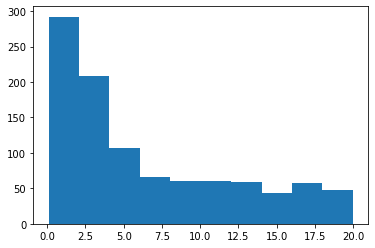

In [16]:
plt.hist(out[0]['rt'].values)

In [2]:
hddm.graphs.run_simulator()

theta is supplied as list --> simulator assumes n_trials = 1


(array([[0.8519965 ],
        [1.0849935 ],
        [1.205992  ],
        ...,
        [0.4260001 ],
        [0.56200016],
        [1.4119959 ]], dtype=float32),
 array([[ 1],
        [-1],
        [-1],
        ...,
        [ 1],
        [ 1],
        [-1]], dtype=int32),
 {'v': array([0.], dtype=float32),
  'a': array([1.], dtype=float32),
  'w': array([0.5], dtype=float32),
  'ndt': array([0.3], dtype=float32),
  's': 1.0,
  'theta': array([0.3], dtype=float32),
  'delta_t': 0.0010000000474974513,
  'max_t': 20.0,
  'n_samples': 10000,
  'simulator': 'ddm_flexbound',
  'boundary_fun_type': 'angle',
  'possible_choices': [-1, 1],
  'trajectory': array([[ 0.0000000e+00],
         [ 5.9762169e-03],
         [ 2.0465178e-02],
         ...,
         [-9.9900000e+02],
         [-9.9900000e+02],
         [-9.9900000e+02]], dtype=float32),
  'boundary': array([ 1.        ,  0.99969065,  0.9993813 , ..., -5.1861067 ,
         -5.1864157 , -5.1867247 ], dtype=float32)})

In [2]:
from hddm import simulators

In [ ]:
hddm.keras_models

In [22]:
sim_out = hddm.simulators.simulator([0.5, 2, 0.6, 0], model = 'ddm', bin_dim = 0, bin_pointwise = False)

theta is supplied as list --> simulator assumes n_trials = 1


In [24]:
sim_out[0].shape

(1000, 1)

In [15]:
hddm.simulators.simulator_single_subject([0, 1.5, 0.5, 0.5, 0.5], model = 'angle')

theta is supplied as list --> simulator assumes n_trials = 1


rt  response  nn_response subj_idx
0    1.233994       1.0            1     none
1    1.587995       1.0            1     none
2    1.086996       1.0            1     none
3    1.702000       0.0           -1     none
4    0.928998       0.0           -1     none
..        ...       ...          ...      ...
995  1.498991       1.0            1     none
996  1.489991       1.0            1     none
997  1.598995       1.0            1     none
998  1.441991       1.0            1     none
999  2.500037       0.0           -1     none

[1000 rows x 4 columns]

In [ ]:
hddm.simulators.simulator_single_subject

In [ ]:
hddm.simulators.simulator_condition_effects(n_conditions = 5, 
                                            n_samples_by_condition = 1000,
                                            condition_effect_on_param = ['v'],
                                            prespecified_params = {'v': [-2, -1, 0, 1, 2], 'a': [2]},
                                            model = 'angle')

In [ ]:
from helper_functions import config as model_config

In [ ]:
model_config['ddm']['param_bounds']

In [ ]:
model = 'ddm'
global_means = np.random.uniform(low = model_config[model]['param_bounds'][0],
                                     high = model_config[model]['param_bounds'][1],
                                     size = (1, len(model_config[model]['param_bounds'][0])))  

In [ ]:
np.minimum(abs(global_means - model_config['ddm']['param_bounds'][0]), abs(model_config['ddm']['param_bounds'][1] - global_means)) / 3

In [ ]:
global_means

In [ ]:
model_config['ddm']

In [ ]:
hddm.simulators.simulator_covariate(n_samples = 1000,
                                    model = 'angle')

In [ ]:
hddm.simulators.simulator_hierarchical(n_subjects = 5, 
                                       n_samples_by_subject = 1000,
                                       model = 'angle')

In [ ]:
p_outlier = []
include_conf = {'angle': ['z', 'theta'] + p_outlier,
                'weibull_cdf':['z', 'alpha', 'beta'] + p_outlier,
                'full_ddm': ['z', 'st', 'sv', 'sz'] + p_outlier,
                'levy': ['z', 'alpha'] + p_outlier,
                'ornstein': ['z', 'g'] + p_outlier,
                'ddm_sdv': ['z', 'sv'] + p_outlier,
                'ddm': ['z']}

# Single Subjects

In [2]:
model = 'ddm'
n_samples = 300
p_outlier = [] # ['p_outlier']

params = make_parameter_sets(model = model,
                             n_parameter_sets = 1)

# hddm_data_single_subject = hddm.simulators.simulator_single_subject(params.values[0],
#                                                                     model = model,
#                                                                     n_samples = n_samples)
                                                                    
# hddm_data_single_subject = hddm.simulators.simulator_hierarchical(n_subjects = 5,
#                                                                   model = model,
#                                                                   n_samples_by_subject = n_samples)

#hddm_data_single_subject = hddm.simulators.simulator_condition_effects(n_conditions = 4, condition_effect_on_param = ['v'], model = model, max_t = 20.0, bin_pointwise = False) # for cnn use --> bin_pointwise = True, bin_dim = 512, max_t = 10.0)
hddm_data_single_subject = hddm.simulators.simulator_condition_effects(n_conditions = 1, condition_effect_on_param = ['v'], model = model, max_t = 10.0, bin_pointwise = True, bin_dim = 512) # for cnn use --> bin_pointwise = True, bin_dim = 512, max_t = 10.0)

#hddm_data_single_subject[0]['subj_idx'] = 0
#hddm_data_single_subject = hddm_preprocess(simulations)


# hddm_model_ddm_analytic_single_subject = hddm.HDDMnn(hddm_data_ddm_single_subject, 
#                                                          model = 'ddm_analytic',
#                                                          informative = False,
#                                                          include = ['z'],
#                                                          is_group_model = False)

# Defining a hddm model
hddm_model_single_subject = hddm.HDDMnn(hddm_data_single_subject[0],
                                        model = model,
                                        informative = False,
                                        include = hddm_include_config[model],
                                        network_type = 'cnn',
                                        nbin = 512,
                                        depends_on = {'v': 'condition'},
                                        p_outlier = 0.0,
                                        w_outlier = 0.01,
                                        is_group_model = False)

                                        #network_type = 'cnn',
                                        #nbin = 512)
                                        #is_group_model = True)


       [158],
       [210],
       [358],
       [143],
       [135],
       [237],
       [446],
       [132],
       [258],
       [371],
       [166],
       [174],
       [209],
       [181],
       [178],
       [200],
       [227],
       [162],
       [241],
       [217],
       [166],
       [217],
       [179],
       [181],
       [144],
       [171],
       [354],
       [149],
       [160],
       [127],
       [163],
       [187],
       [166],
       [262],
       [123],
       [180],
       [219],
       [165],
       [261],
       [185],
       [176],
       [151],
       [279],
       [141],
       [262],
       [165],
       [301],
       [194],
       [129],
       [111],
       [275],
       [310],
       [136],
       [158],
       [278],
       [204],
       [233],
       [177],
       [180],
       [125],
       [215],
       [296],
       [181],
       [151],
       [162],
       [199],
       [178],
       [172],
       [198],
       [178],
       [191],
     

In [3]:
nmcmc = 150
hddm_model_single_subject.sample(nmcmc, 
                                 burn = 50)

 [-----------------100%-----------------] 150 of 150 complete in 19.1 sec

In [4]:
hddm_data_single_subject

(       rt  response  nn_response  condition  subj_idx
 0      81         0            0          0         0
 1     106         0            0          0         0
 2     103         0            0          0         0
 3      78         0            0          0         0
 4     101         0            0          0         0
 ...   ...       ...          ...        ...       ...
 3995  240         1            1          3         0
 3996   76         0            0          3         0
 3997  192         0            0          3         0
 3998  188         0            0          3         0
 3999  107         0            0          3         0
 
 [4000 rows x 5 columns],
 {'v(0)': -1.7093026248732144,
  'v(1)': 1.8889138709285413,
  'v(2)': -0.1497175017575434,
  'v(3)': 0.052057868668021534,
  'a': 1.6484012763419233,
  'z': 0.18528733970968736,
  't': 1.4596391913566074},
 array([[-1.70930262,  1.64840128,  0.18528734,  1.45963919],
        [ 1.88891387,  1.64840128,  0.18528

In [4]:
hddm_model_single_subject.get_traces()

a      v(0)      v(1)      v(2)      v(3)         t   z_trans
0   2.097515  0.762967 -1.653333 -1.650364 -1.088060  0.095420 -2.454717
1   2.079034  0.754625 -1.654161 -1.627021 -1.158464  0.094990 -2.410319
2   2.087503  0.765417 -1.738959 -1.571784 -1.171726  0.094359 -2.438408
3   2.069453  0.739774 -1.746238 -1.729518 -1.143928  0.092662 -2.367125
4   2.066187  0.736786 -1.801652 -1.662313 -1.176269  0.093753 -2.335661
..       ...       ...       ...       ...       ...       ...       ...
95  2.117360  0.756579 -1.757908 -1.609457 -1.136721  0.092214 -2.427248
96  2.082288  0.786918 -1.726050 -1.681851 -1.117026  0.094020 -2.396950
97  2.129099  0.810564 -1.738368 -1.603920 -1.101351  0.091009 -2.453135
98  2.125255  0.789634 -1.727098 -1.586951 -1.073386  0.088687 -2.474904
99  2.144895  0.760158 -1.757919 -1.600779 -1.275292  0.093610 -2.371367

[100 rows x 7 columns]

In [27]:
hddm_data_single_subject[0]['response'][hddm_data_single_subject[0]['response'] == 0] = -1

(array([  1.,   1.,   3.,   0.,   3.,   2.,   4.,   5.,   5.,   9.,  22.,
         29.,  46.,  64.,  90., 190., 333., 436., 729.,  33.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 596., 567., 308.,
        207., 111.,  70.,  57.,  24.,  11.,  16.,   8.,   4.,   3.,   1.,
          0.,   1.,   1.,   0.,   1.,   1.]),
 array([-2.2265625 , -2.13554688, -2.04453125, -1.95351563, -1.8625    ,
        -1.77148438, -1.68046875, -1.58945312, -1.4984375 , -1.40742187,
        -1.31640625, -1.22539062, -1.134375  , -1.04335937, -0.95234375,
        -0.86132812, -0.7703125 , -0.67929687, -0.58828125, -0.49726563,
        -0.40625   , -0.31523437, -0.22421875, -0.13320313, -0.0421875 ,
         0.04882812,  0.13984375,  0.23085938,  0.321875  ,  0.41289063,
         0.50390625,  0.59492188,  0.6859375 ,  0.77695312,  0.86796875,
         0.95898438,  1.05      ,  1.14101563,  1.23203125,  1.32304688,
         1.4140625 ,  1.50507813,  1.59609375,  1.68710937,  1.778125  ,
 

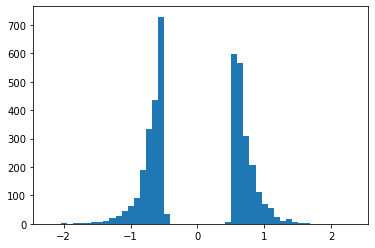

In [30]:
plt.hist(hddm_data_single_subject[0][hddm_data_single_subject[0]['subj_idx'] == 0]['rt'] / 51.2 * hddm_data_single_subject[0][hddm_data_single_subject[0]['subj_idx'] == 0]['response'], bins = 50)

In [31]:
hddm_data_single_subject[1]

{'v(0)': -0.5695734066774856,
 'v(1)': 1.7332868615236325,
 'v(2)': -1.152013713654425,
 'v(3)': 0.7315899431784629,
 'a': 0.7363633601690638,
 'z': 0.4419190463510131,
 't': 0.95418453339962}

In [32]:
x = hddm.simulators.simulator_single_subject(parameters = [-0.569, 0.73, 0.44, 0.95], model = 'ddm')

theta is supplied as list --> simulator assumes n_trials = 1


(array([  2.,   0.,   2.,   2.,   4.,   1.,   5.,   3.,   8.,  19.,  18.,
         26.,  35.,  51.,  76., 117., 170., 205.,  10.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  39.,  58.,
         47.,  29.,  22.,  14.,   8.,  14.,   5.,   1.,   1.,   4.,   1.,
          0.,   1.,   0.,   0.,   0.,   2.]),
 array([-3.80497551, -3.65003669, -3.49509787, -3.34015904, -3.18522022,
        -3.0302814 , -2.87534258, -2.72040376, -2.56546494, -2.41052611,
        -2.25558729, -2.10064847, -1.94570965, -1.79077083, -1.635832  ,
        -1.48089318, -1.32595436, -1.17101554, -1.01607672, -0.8611379 ,
        -0.70619907, -0.55126025, -0.39632143, -0.24138261, -0.08644379,
         0.06849504,  0.22343386,  0.37837268,  0.5333115 ,  0.68825032,
         0.84318914,  0.99812797,  1.15306679,  1.30800561,  1.46294443,
         1.61788325,  1.77282207,  1.9277609 ,  2.08269972,  2.23763854,
         2.39257736,  2.54751618,  2.70245501,  2.85739383,  3.01233265,
 

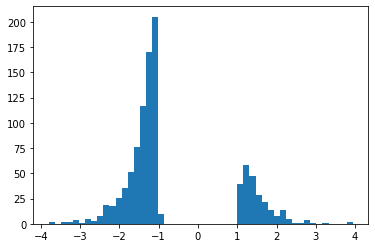

In [35]:
plt.hist(x['rt'] * x['nn_response'], bins = 50)

In [4]:
post_pred = hddm.utils.post_pred_gen(hddm_model_single_subject)

rom random function in wfpt_nn
[-0.9502127   1.7423886   0.67785656  1.5120591 ]
print theta from random function in wfpt_nn
[-0.9413787   1.7669479   0.67537373  1.4914073 ]
print theta from random function in wfpt_nn
[-0.9413787   1.7669479   0.67537373  1.4914073 ]
print theta from random function in wfpt_nn
[-0.97820646  1.7432358   0.6820008   1.5117122 ]
print theta from random function in wfpt_nn
[-0.9556247  1.7385418  0.6837998  1.514635 ]
print theta from random function in wfpt_nn
[-0.99464947  1.7740564   0.6777179   1.5038841 ]
print theta from random function in wfpt_nn
[-0.99715555  1.7745527   0.6888021   1.5078492 ]
print theta from random function in wfpt_nn
[-0.9509969  1.7361969  0.6831729  1.5094953]
print theta from random function in wfpt_nn
[-0.98184633  1.7708625   0.6761656   1.5031322 ]
print theta from random function in wfpt_nn
[-0.9968771   1.7628696   0.67791307  1.5029681 ]
print theta from random function in wfpt_nn
[-0.9968771   1.7628696   0.67791307 

In [5]:
hddm.utils.post_pred_stats(data = hddm_data_single_subject[0], sim_datasets = post_pred)

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


observed      mean       std           SEM           MSE credible  \
stat                                                                            
accuracy    0.523750  0.523907  0.471220  2.465082e-08      0.222048     True   
mean_ub   133.828644  2.453784  0.282379  1.725935e+04  17259.433594    False   
std_ub     51.357178  0.766603  0.342333  2.559406e+03   2559.523438    False   
10q_ub     92.000000  1.805579  0.078257  8.135034e+03   8135.039551    False   
30q_ub    104.000000  1.991018  0.105844  1.040583e+04  10405.843750    False   
50q_ub    118.000000  2.217738  0.179879  1.340553e+04  13405.564453    False   
70q_ub    139.000000  2.572458  0.322139  1.861247e+04  18612.578125    False   
90q_ub    194.199997  3.398087  0.717459  3.640537e+04  36405.886719    False   
mean_lb  -159.756424 -3.323526  0.602812  2.447125e+04  24471.615234    False   
std_lb     60.288105  0.878874  0.487459  3.529457e+03   3529.694092    False   
10q_lb    109.000000  2.462288  0.395630  1.135028e+04  11350.441406    False   
30q_lb    125.000000  2.789369  0.445854  1.493544e+04  14935.636719    False   
50q_lb    139.000000  3.133835  0.557122  1.845962e+04  18459.925781    False   
70q_lb    167.000000  3.585807  0.726376  2.670420e+04  26704.726562    False   
90q_lb    233.000000  4.386219  1.111724  5.226426e+04  52265.500000    False   

          quantile  mahalanobis  
stat                             
accuracy      50.0     0.000333  
mean_ub      100.0   465.243408  
std_ub       100.0   147.781647  
10q_ub       100.0  1152.547119  
30q_ub       100.0   963.770813  
50q_ub       100.0   643.669128  
70q_ub       100.0   423.504608  
90q_ub       100.0   265.941101  
mean_lb        0.0   259.505371  
std_lb       100.0   121.875237  
10q_lb       100.0   269.286530  
30q_lb       100.0   274.104767  
50q_lb       100.0   243.871429  
70q_lb       100.0   224.971863  
90q_lb       100.0   205.638992

In [4]:
def my_dataprocessor(x):
    print(x[:, 0])
    x[x[:, 0] == 0, 1] = - x[x[:, 0] == 0, 1]
    print(x)
    return x[:,1]

In [4]:
def my_dataprocessor_mlp(x):
    print(x)
    return x[:, 1] * x[:, 0]

printing bottom_node.pdf(value_range)
shapes of bottom node.pdf(value_range)
printing value range from kabuki as well
[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.0

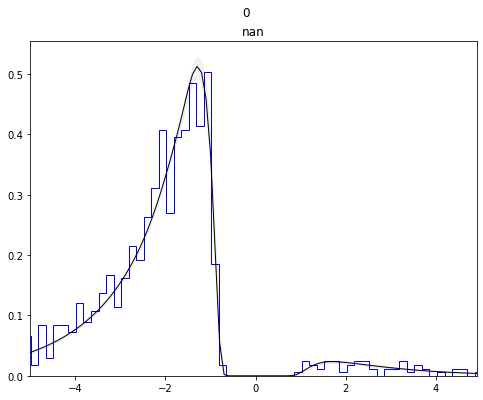

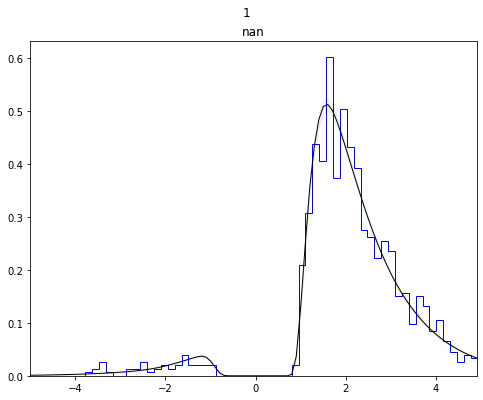

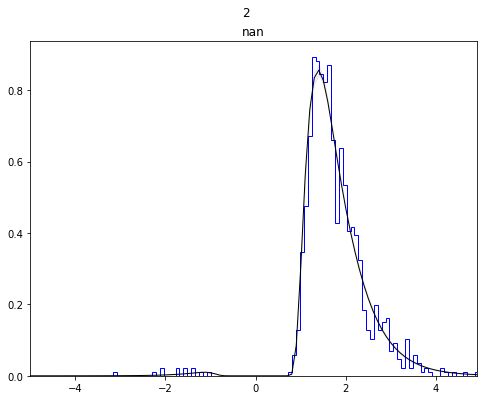

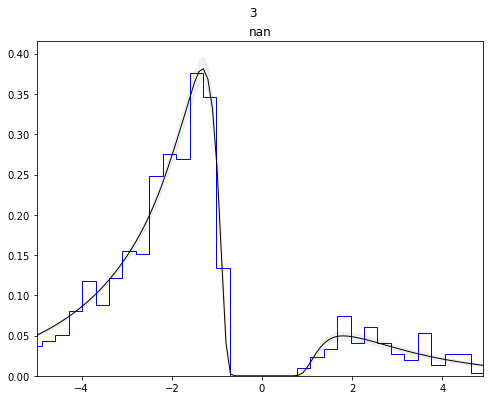

In [5]:
hddm_model_single_subject.plot_posterior_predictive(value_range = np.arange(-5, 5, .1), **{'data_preprocessor': my_dataprocessor_mlp})

In [7]:
# END OF HDDMNN TEST PART
value_range = np.arange(-100, 100, 1).astype(np.int_)

In [11]:
hasattr(hddm_model_single_subject, 'nn')


NameError: name 'nn' is not defined

In [8]:
value_range

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   

In [2]:
# STANDARD DDM
model = 'ddm'
n_samples = 300
p_outlier = [] # ['p_outlier']

params = make_parameter_sets(model = model,
                             n_parameter_sets = 1)

# hddm_data_single_subject = hddm.simulators.simulator_single_subject(params.values[0],
#                                                                     model = model,
#                                                                     n_samples = n_samples)
                                                                    
hddm_data_single_subject = hddm.simulators.simulator_hierarchical(n_subjects = 5,
                                                                  model = model,
                                                                  n_samples_by_subject = n_samples)

#hddm_data_single_subject = hddm_preprocess(simulations)



# hddm_model_ddm_analytic_single_subject = hddm.HDDMnn(hddm_data_ddm_single_subject, 
#                                                          model = 'ddm_analytic',
#                                                          informative = False,
#                                                          include = ['z'],
#                                                          is_group_model = False)

# Defining a hddm model
hddm_base_model_single_subject = hddm.HDDM(hddm_data_single_subject[0],
                                      informative = False,
                                      include = hddm_include_config[model],#depends_on = {'z': 'condition'},
                                      p_outlier = 0.0,
                                      is_group_model = False)

Now adding the HDDMBase include:
Include from inside HDDMBase:  {'a', 't', 'v'}
passed through invlog node generation with deterministic invlogit
Is Neural Net?  False


In [3]:
nmcmc = 500
hddm_base_model_single_subject.sample(nmcmc, 
                                     burn = 100)

 [-----------------100%-----------------] 500 of 500 complete in 8.7 sec

In [4]:
hddm.utils.post_pred_gen(hddm_base_model_single_subject, progress_bar = True)

printing observeds
     knode_name stochastic observed   subj  node tag depends hidden   rt  \
wfpt       wfpt      False     True  False  wfpt  ()      []  False  NaN   

     response subj_idx mean  std 2.5q  25q  50q  75q 97.5q mc err  
wfpt      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  
printing len of observeds
1
printing dir of observeds
['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__

rt  response
node sample                         
wfpt 0      0     2.835784       1.0
            1     1.803484       1.0
            2    -2.490440       0.0
            3    -2.285340       0.0
            4    -4.410140       0.0
...                    ...       ...
     499    1495  2.267977       1.0
            1496  5.015477       1.0
            1497 -7.519933       0.0
            1498  0.827077       1.0
            1499 -4.944333       0.0

[750000 rows x 2 columns]

In [15]:
hddm.utils.post_pred_gen(hddm_base_model_single_subject, progress_bar = True)

, 'to_period', 'to_pickle', 'to_records', 'to_sql', 'to_stata', 'to_string', 'to_timestamp', 'to_xarray', 'transform', 'transpose', 'truediv', 'truncate', 'tshift', 'tz_convert', 'tz_localize', 'unstack', 'update', 'values', 'var', 'where', 'xs']
            rt  response
0    -1.599051       0.0
1     1.700490       1.0
2     1.703290       1.0
3    -1.713051       0.0
4     1.861190       1.0
...        ...       ...
1495 -1.661051       0.0
1496 -1.679651       0.0
1497 -1.858751       0.0
1498 -1.591951       0.0
1499  1.806890       1.0

[1500 rows x 2 columns]
now done calling random function
now calling random function
random out
['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__'

rt  response
node sample                         
wfpt 0      0    -1.673005       0.0
            1    -1.608105       0.0
            2     1.688644       1.0
            3     1.989744       1.0
            4    -1.916205       0.0
...                    ...       ...
     499    1495 -2.147317       0.0
            1496 -1.715017       0.0
            1497  1.749955       1.0
            1498 -1.747117       0.0
            1499  2.121155       1.0

[750000 rows x 2 columns]

In [29]:
hddm.utils.post_pred_stats(data = hddm_data_single_subject[0], sim_datasets = post_pred)

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


observed      mean       std       SEM        MSE credible  \
stat                                                                   
accuracy  0.474750  0.469736  0.465293  0.000025   0.216523     True   
mean_ub   3.871692  5.076236  1.932709  1.450926   5.186291     True   
std_ub    1.128456  1.652976  1.310173  0.275121   1.991675     True   
10q_ub    2.772579  3.418417  0.968538  0.417107   1.355174     True   
30q_ub    3.233600  4.086074  1.300863  0.726712   2.418956     True   
50q_ub    3.680585  4.733942  1.715489  1.109559   4.052463     True   
70q_ub    4.154951  5.549620  2.239977  1.945101   6.962600     True   
90q_ub    5.142280  7.067328  3.350501  3.705812  14.931670     True   
mean_lb  -2.456239 -2.168926  0.461902  0.082549   0.295902     True   
std_lb    1.605939  0.836278  0.741860  0.592379   1.142734     True   
10q_lb    1.570570  1.574165  0.030394  0.000013   0.000937     True   
30q_lb    1.717569  1.704120  0.082525  0.000181   0.006991     True   
50q_lb    1.908566  1.880040  0.181334  0.000814   0.033696     True   
70q_lb    2.275562  2.195252  0.409848  0.006450   0.174425     True   
90q_lb    3.817575  3.103053  1.244817  0.510542   2.060112     True   

           quantile  mahalanobis  
stat                              
accuracy  50.000000     0.010777  
mean_ub   33.333332     0.623241  
std_ub    65.066666     0.400344  
10q_ub    33.000000     0.666817  
30q_ub    33.333332     0.655315  
50q_ub    33.400002     0.614027  
70q_ub    33.333332     0.622626  
90q_ub    33.400002     0.574555  
mean_lb   25.000000     0.622022  
std_lb    75.000000     1.037476  
10q_lb    58.250000     0.118289  
30q_lb    71.849998     0.162970  
50q_lb    74.099998     0.157314  
70q_lb    75.000000     0.195951  
90q_lb    75.000000     0.573998

printing bottom_node.pdf(value_range)
[1.0000059e-07 1.0000059e-07 1.0000059e-07 ... 1.0000059e-07 1.0000059e-07
 1.0000059e-07]
shapes of bottom node.pdf(value_range)
(2000,)
printing from kabuiki
print extended parents: 
{<pymc.distributions.new_dist_class.<locals>.new_class 'v(0)' at 0x1942453790>, <pymc.distributions.new_dist_class.<locals>.new_class 'a' at 0x194171fd10>, <pymc.distributions.new_dist_class.<locals>.new_class 'z_trans' at 0x1942446ad0>, <pymc.distributions.new_dist_class.<locals>.new_class 't' at 0x1942446850>}
node values: 
bottom node: 
wfpt(0)
bottom node dir: 
['ParentDict', '__abs__', '__add__', '__and__', '__array_priority__', '__call__', '__class__', '__complex__', '__delattr__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__hex__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__init__', '

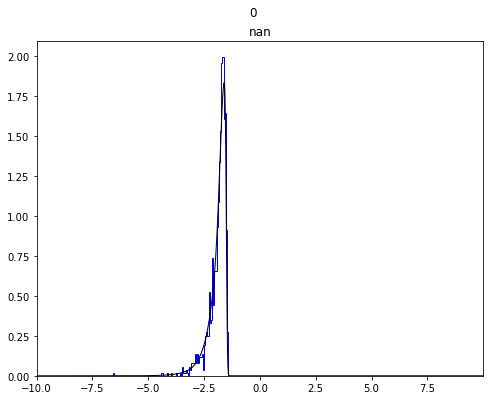

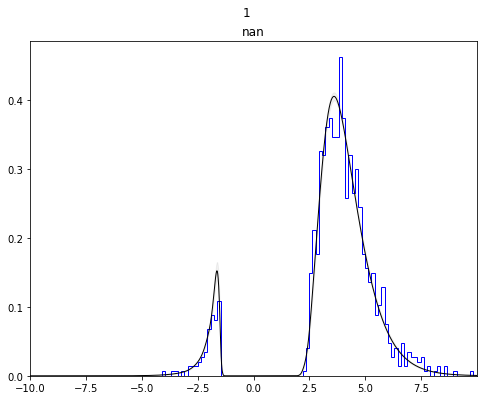

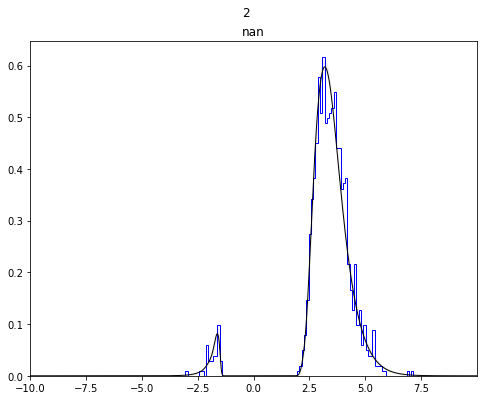

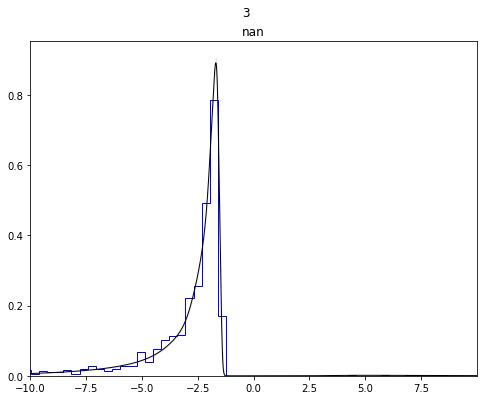

In [31]:
hddm_model_single_subject.plot_posterior_predictive(value_range = np.arange(-10, 10, 0.01))

In [12]:
hddm_model_single_subject.get_traces()

a      v(0)      v(1)      v(2)      v(3)         t   z_trans
0    0.495245  1.470053  1.775675 -1.245499 -1.003290  1.801307 -0.588646
1    0.500941  1.506254  1.806565 -1.311251 -0.973194  1.801151 -0.610097
2    0.500220  1.545751  1.759593 -1.351285 -1.058744  1.801735 -0.603344
3    0.502258  1.607973  1.834549 -1.240465 -0.902133  1.800382 -0.642293
4    0.499525  1.602473  1.851848 -1.323595 -1.039476  1.803189 -0.654022
..        ...       ...       ...       ...       ...       ...       ...
195  0.505241  1.487107  1.755793 -1.226396 -0.973868  1.804236 -0.685945
196  0.499455  1.479374  1.739468 -1.226617 -1.035416  1.800761 -0.534350
197  0.501447  1.362944  1.788519 -1.421245 -1.063358  1.801348 -0.520134
198  0.502799  1.360012  1.658398 -1.357241 -1.031156  1.798880 -0.570760
199  0.502872  1.397811  1.913818 -1.361753 -1.045805  1.801357 -0.572764

[200 rows x 7 columns]

In [13]:
 hddm_data_single_subject[1]

{'v(0)': 1.2042300760416733,
 'v(1)': 1.52231171492482,
 'v(2)': -1.3422011978133273,
 'v(3)': -1.0096560295677355,
 'a': 0.7206272446561308,
 'z': 0.41668136296083236,
 't': 1.7595447484664213,
 'theta': 0.6272654620059884}

In [4]:
help(hddm.utils.post_pred_gen)

Help on function post_pred_gen in module kabuki.analyze:

post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True)
    Run posterior predictive check on a model.
    
    :Arguments:
        model : kabuki.Hierarchical
            Kabuki model over which to compute the ppc on.
    
    :Optional:
        samples : int
            How many samples to generate for each node.
        groupby : list
            Alternative grouping of the data. If not supplied, uses splitting
            of the model (as provided by depends_on).
        append_data : bool (default=False)
            Whether to append the observed data of each node to the replicatons.
        progress_bar : bool (default=True)
            Display progress bar
    
    :Returns:
        Hierarchical pandas.DataFrame with multiple sampled RT data sets.
        1st level: wfpt node
        2nd level: posterior predictive sample
        3rd level: original data index
    
    :See also:
        post

In [15]:
 hddm_model_single_subject.data.iloc[obs['node'].value.index]

rt  response  nn_response  condition
0    0.552140      -1.0           -1          0
1    0.284143      -1.0           -1          0
2    0.312143      -1.0           -1          0
3    0.611139      -1.0           -1          0
4    0.655138      -1.0           -1          0
..        ...       ...          ...        ...
995  1.548159       1.0            1          0
996  0.467141      -1.0           -1          0
997  0.452141      -1.0           -1          0
998  0.779137      -1.0           -1          0
999  0.853136      -1.0           -1          0

[1000 rows x 4 columns]

In [17]:
iter_data = ((name, hddm_model_single_subject.data.iloc[obs['node'].value.index]) for name, obs in hddm_model_single_subject.iter_observeds())

In [19]:
for name, data in iter_data:
    print('name')
    print(name)
    print('data')
    print(data)
    print(data.index)
    print(hddm_model_single_subject.get_data_nodes(data.index))

name
wfpt(1)
data
           rt  response  nn_response  condition
0    0.552140      -1.0           -1          0
1    0.284143      -1.0           -1          0
2    0.312143      -1.0           -1          0
3    0.611139      -1.0           -1          0
4    0.655138      -1.0           -1          0
..        ...       ...          ...        ...
995  1.548159       1.0            1          0
996  0.467141      -1.0           -1          0
997  0.452141      -1.0           -1          0
998  0.779137      -1.0           -1          0
999  0.853136      -1.0           -1          0

[1000 rows x 4 columns]
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)
data nodes
[<pymc.distributions.new_dist_class.<locals>.new_class 'wfpt(0)' at 0x193cb14c50>, <pymc.distributions.new_dist_class.<locals>.new_class 'wfpt(1)' at 0x193cb14f10>, <pymc.distributions.new_d

NotImplementedError: Supply a grouping so that at most 1 observed node codes for each group.

In [35]:
obs['node'].markov_blanket

{<pymc.distributions.new_dist_class.<locals>.new_class 'a_subj.004' at 0x193464d8d0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'z_subj_trans.004' at 0x19346e78d0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'theta_subj.004' at 0x193470eed0>,
 <pymc.distributions.new_dist_class.<locals>.new_class 't_subj.004' at 0x19346c1b50>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'v_subj.004' at 0x193468cf10>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'wfpt.004' at 0x1934733610>}

In [38]:
hddm_model_single_subject.get_data_nodes()

TypeError: get_data_nodes() missing 1 required positional argument: 'idx'

In [29]:
hddm_model_single_subject.data

rt  response  nn_response subj_idx
0    0.816441       1.0            1      000
1    1.267436       1.0            1      000
2    1.691455       1.0            1      000
3    1.303437       1.0            1      000
4    0.813441       1.0            1      000
..        ...       ...          ...      ...
295  1.323647       1.0            1      004
296  1.634662      -1.0           -1      004
297  1.173645       1.0            1      004
298  1.029647       1.0            1      004
299  0.479653       1.0            1      004

[1500 rows x 4 columns]

In [7]:
# Replicate the hddm tutorial
data, params = hddm.generate.gen_rand_data(params = {'easy': {'v': 1, 'a': 2, 't': .3},
                                                     'hard': {'v': 1, 'a': 2, 't': .3}})

In [15]:
np.unique(data['subj_idx'])

array([0])

In [8]:
data

rt  response  subj_idx condition
0   2.857       1.0         0      easy
1   0.864       1.0         0      easy
2   0.681       1.0         0      easy
3   0.707       1.0         0      easy
4   1.220       1.0         0      easy
..    ...       ...       ...       ...
95  1.162       1.0         0      hard
96  1.118       1.0         0      hard
97  1.882       1.0         0      hard
98  0.923       1.0         0      hard
99  1.162       0.0         0      hard

[100 rows x 4 columns]

In [9]:
m = hddm.HDDM(data, depends_on={'v': 'condition'})
m.sample(500, burn=20)

Now adding the HDDMBase include:
Include from inside HDDMBase:  {'a', 't', 'v'}
creating node: 
a
{'alpha': 4.0, 'beta': 2.6666666666666665, 'value': 1}
       rt  response  subj_idx condition
0   2.857       1.0         0      easy
1   0.864       1.0         0      easy
2   0.681       1.0         0      easy
3   0.707       1.0         0      easy
4   1.220       1.0         0      easy
..    ...       ...       ...       ...
95  1.162       1.0         0      hard
96  1.118       1.0         0      hard
97  1.882       1.0         0      hard
98  0.923       1.0         0      hard
99 -1.162       0.0         0      hard

[100 rows x 4 columns]
creating node: 
v(easy)
{'mu': 2, 'tau': 0.1111111111111111, 'value': 2}
       rt  response  subj_idx condition
0   2.857       1.0         0      easy
1   0.864       1.0         0      easy
2   0.681       1.0         0      easy
3   0.707       1.0         0      easy
4   1.220       1.0         0      easy
5   1.544       1.0         0 

In [10]:
ppc_data = hddm.utils.post_pred_gen(m)

data
       rt  response  subj_idx condition
0   2.857       1.0         0      easy
1   0.864       1.0         0      easy
2   0.681       1.0         0      easy
3   0.707       1.0         0      easy
4   1.220       1.0         0      easy
5   1.544       1.0         0      easy
6   0.923       1.0         0      easy
7   1.224       1.0         0      easy
8   0.584       1.0         0      easy
9   1.217       1.0         0      easy
10  1.047       1.0         0      easy
11  0.738       1.0         0      easy
12  1.446       1.0         0      easy
13  1.358       1.0         0      easy
14  0.537       1.0         0      easy
15  1.826       1.0         0      easy
16  1.570       1.0         0      easy
17  0.538       1.0         0      easy
18  0.591       1.0         0      easy
19  1.152       1.0         0      easy
20  0.634       1.0         0      easy
21  0.544       1.0         0      easy
22  1.484       1.0         0      easy
23  0.638       1.0         0      

In [24]:
hddm_data_single_subject

(           rt  response  nn_response subj_idx
 0    0.442486       1.0            1      000
 1    0.455486       1.0            1      000
 2    0.240487       1.0            1      000
 3    0.303487       1.0            1      000
 4    0.479486       0.0           -1      000
 ..        ...       ...          ...      ...
 295  0.277007       1.0            1      004
 296  0.641004       1.0            1      004
 297  0.601004       0.0           -1      004
 298  0.475006       1.0            1      004
 299  0.290007       1.0            1      004
 
 [1500 rows x 4 columns],
 {'v': 2.0,
  'v_std': 2.0,
  'a': 1.1867649826443134,
  'a_std': 0.10159369834440563,
  'z': 0.6546448163175191,
  'z_std': 0.021189518472272947,
  't': 0.09846561999196905,
  't_std': 0.01974515754179075,
  'theta': 1.1229049586789666,
  'theta_std': 0.07440743471388511,
  'v_subj.000': -0.6016398668289185,
  'a_subj.000': 1.2396516799926758,
  'z_subj.000': 0.6579246520996094,
  't_subj.000': 0.1014870

In [19]:
hddm_model_single_subject.data.iloc[obs['node']]

NameError: name 'obs' is not defined

e-07 1.00000591e-07
 1.00000591e-07 1.00000591e-07 1.00000591e-07 1.00000591e-07
 1.00000591e-07 1.00000591e-07 1.00000591e-07 1.00413438e-07
 1.01607348e-07 1.02787219e-07 1.03816518e-07 1.04553550e-07
 1.04888919e-07 1.04779936e-07 1.04272743e-07 1.03502551e-07
 1.02683956e-07 1.02127480e-07 1.02361881e-07 1.04236555e-07
 1.07390221e-07 1.06078367e-07 1.00000591e-07 1.05758353e-07
 2.55382645e-07 5.94825888e+00 1.00000591e-07 1.00000591e-07
 1.00000591e-07 1.00000591e-07 1.00000591e-07 1.00501005e-07
 1.00735718e-07 1.00663492e-07 1.00547780e-07 1.00445234e-07
 1.00360403e-07 1.00283664e-07 1.00204510e-07 1.00116246e-07
 1.00014134e-07 1.00000591e-07 1.00000591e-07 1.01169533e-07
 1.01134219e-07 1.00962303e-07 1.00595926e-07 1.00000591e-07
 1.00000591e-07 1.00000591e-07 1.00000591e-07 1.00000591e-07
 1.00000591e-07 1.00000591e-07 1.00000591e-07 1.00000591e-07
 1.00000591e-07 1.00000591e-07 1.04805316e-07 1.56879222e+00
 3.17675187e-07 1.00000591e-07 1.00000591e-07 1.00000591e-07
 1.0

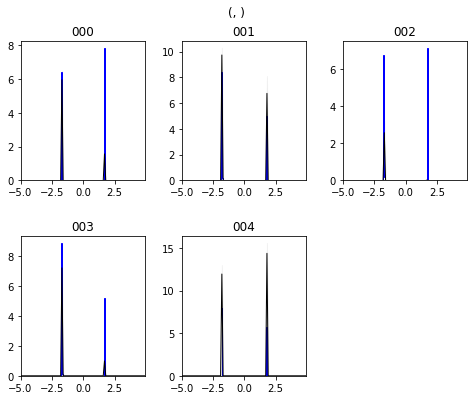

In [16]:
hddm_model_single_subject.plot_posterior_predictive(required_method = 'random', bins = 50, value_range = np.arange(-5, 5, 0.1))

In [7]:
hddm_base_model_single_subject.plot_posterior_predictive(required_method = 'pdf')

NameError: name 'hddm_base_model_single_subject' is not defined

In [9]:
observeds = hddm_model_single_subject.get_observeds()

In [10]:
for tag, nodes in observeds.groupby('tag'):
    my_nodes = nodes

In [14]:
for subj_i, (node_name, bottom_node) in enumerate(my_nodes.iterrows()):
    #print(subj_i, (node_name, bottom_node))
    print(dir(bottom_node['node']))

['ParentDict', '__abs__', '__add__', '__and__', '__array_priority__', '__call__', '__class__', '__complex__', '__delattr__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__hex__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__lshift__', '__lt__', '__mod__', '__module__', '__mul__', '__name__', '__ne__', '__neg__', '__new__', '__oct__', '__or__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truedi

In [20]:
my_new_fun(**{'a': 1, 'b': 2, 'c': 3}, **{'d':4})

1
2


In [ ]:
hddm_data_single_subject = hddm.simulators.simulator_condition_effects(n_conditions = 5,
                                                                       model = model)

In [11]:
hddm_base_model_single_subject.get_group_nodes()

knode_name stochastic observed   subj     node tag depends hidden  \
a                a       True    False  False        a  ()      []  False   
a_std        a_std       True    False  False    a_std  ()      []  False   
v                v       True    False  False        v  ()      []  False   
v_std        v_std       True    False  False    v_std  ()      []  False   
t                t       True    False  False        t  ()      []  False   
t_std        t_std       True    False  False    t_std  ()      []  False   
z_trans    z_trans       True    False  False  z_trans  ()      []   True   
z_std        z_std       True    False  False    z_std  ()      []  False   

          rt response nn_response subj_idx       mean        std       2.5q  \
a        NaN      NaN         NaN      NaN    4.67851   0.336584    4.12576   
a_std    NaN      NaN         NaN      NaN   0.407922   0.208334  0.0756975   
v        NaN      NaN         NaN      NaN     1.6394   0.733008  -0.251663   
v_std    NaN      NaN         NaN      NaN    1.35225    0.10461     1.0626   
t        NaN      NaN         NaN      NaN   0.924907   0.196067     0.3868   
t_std    NaN      NaN         NaN      NaN   0.298081    0.18678   0.120842   
z_trans  NaN      NaN         NaN      NaN        NaN        NaN        NaN   
z_std    NaN      NaN         NaN      NaN  0.0957166  0.0710298  0.0139305   

               25q        50q       75q     97.5q      mc err  
a          4.48119    4.62131   4.80099   5.61744   0.0336584  
a_std     0.290664   0.384473   0.49386  0.884885   0.0208334  
v          1.18041    1.71537   2.15161   2.93147   0.0733008  
v_std      1.31518    1.37223   1.43165   1.49454    0.010461  
t         0.847961    0.94679  0.997449   1.33723   0.0196067  
t_std     0.166328   0.235515  0.353091  0.814151    0.018678  
z_trans        NaN        NaN       NaN       NaN         NaN  
z_std    0.0473803  0.0749743  0.135569  0.281506  0.00710298

In [4]:
model = 'weibull_cdf'
n_samples = 1000
p_outlier = [] # ['p_outlier']

# params = make_parameter_sets(model = model,
#                              n_parameter_sets = 1)

# hddm_data_single_subject = hddm.simulators.simulator_single_subject(params.values[0],
#                                                                     model = model,
#                                                                     n_samples = n_samples)
                                                                    
# hddm_data_single_subject = hddm.simulators.simulator_hierarchical(n_subjects = 5,
#                                                                   model = model,
#                                                                   n_samples_by_subject = n_samples)

#hddm_data_single_subject = hddm.simulators.simulator_condition_effects(n_conditions = 4, condition_effect_on_param = ['v'], model = model, max_t = 20.0, bin_pointwise = False) # for cnn use --> bin_pointwise = True, bin_dim = 512, max_t = 10.0)
hddm_data_single_subject = hddm.simulators.simulator_single_subject(parameters = [1, 1.5, 0.55, 0.5, 3.0, 3.0], model = model, max_t = 20.0, bin_pointwise = False, n_samples = n_samples) # for cnn use --> bin_pointwise = True, bin_dim = 512, max_t = 10.0)

#hddm_data_single_subject[0]['subj_idx'] = 0
#hddm_data_single_subject = hddm_preprocess(simulations)


# hddm_model_ddm_analytic_single_subject = hddm.HDDMnn(hddm_data_ddm_single_subject, 
#                                                          model = 'ddm_analytic',
#                                                          informative = False,
#                                                          include = ['z'],
#                                                          is_group_model = False)

# Defining a hddm model
hddm_model_single_subject = hddm.HDDMnn(hddm_data_single_subject,
                                        model = model,
                                        informative = False,
                                        include = hddm_include_config[model],
                                        network_type = 'mlp',#depends_on = {'v': 'condition'},
                                        p_outlier = 0.0,
                                        w_outlier = 0.01,
                                        is_group_model = False)

                                        #network_type = 'cnn',
                                        #nbin = 512)
                                        #is_group_model = True)

theta is supplied as list --> simulator assumes n_trials = 1
Now adding the HDDMBase include:
Include from inside HDDMBase:  {'a', 't', 'v'}
Recognized HDDMnn
RT
0.66100013
3.8539393
Response
[-1.  1.]
printing include: 
{'z', 'a', 't', 'alpha', 'beta', 'v'}
passed through invlog node generation with deterministic invlogit
knodes
OrderedDict([('a_bottom', a), ('v_bottom', v), ('t_bottom', t), ('z_trans', z_trans), ('z_bottom', z), ('alpha_bottom', alpha), ('beta_bottom', beta)])
wfpt parents: 
OrderedDict([('p_outlier', 0.0), ('w_outlier', 0.01), ('a', a), ('v', v), ('t', t), ('z', z), ('alpha', alpha), ('beta', beta)])
Is Neural Net?  True
0.0


In [5]:
nmcmc = 200
hddm_model_single_subject.sample(nmcmc, 
                                     burn = 100)

 [-----------------100%-----------------] 200 of 200 complete in 13.2 sec

In [4]:
hddm_model_single_subject.get_traces()

a         v         t   z_trans     alpha      beta
0   1.414386  1.069143  0.531522  0.354676  4.164521  2.825746
1   1.433025  1.126569  0.535780  0.244681  3.974228  2.967259
2   1.410784  1.037304  0.535949  0.206120  4.636187  2.777472
3   1.361708  1.039948  0.523122  0.176541  4.034294  2.971145
4   1.367001  1.043667  0.508299  0.115897  4.133353  2.841229
..       ...       ...       ...       ...       ...       ...
95  1.532829  1.124337  0.464964  0.136105  4.564533  2.874872
96  1.515382  1.106452  0.482529  0.164177  4.580307  2.963958
97  1.481263  1.105345  0.483054  0.097488  4.067252  2.798079
98  1.486624  1.073610  0.489401  0.223789  4.842009  2.792707
99  1.451456  1.044982  0.485711  0.186418  4.812269  2.828282

[100 rows x 6 columns]

In [9]:
#hddm_model_single_subject.get_traces()
ground_truth_data = hddm_data_single_subject
gt_dat_dict = {}

In [10]:
for i in np.sort(np.unique(ground_truth_data['subj_idx'])):
    print(i)
    gt_dat_dict[i] = ground_truth_data.loc[ground_truth_data['subj_idx'] == i][['rt', 'response']]
    gt_dat_dict[i].loc[gt_dat_dict[i]['response'] == 0,  'response'] = - 1

none


In [11]:
gt_dat_dict

{'none':            rt  response
 0    1.051996       1.0
 1    2.957004       1.0
 2    1.873008       1.0
 3    1.062996       1.0
 4    1.679999       1.0
 ..        ...       ...
 995  1.198995       1.0
 996  2.240025       1.0
 997  1.019997       1.0
 998  1.175995       1.0
 999  1.157995       1.0
 
 [1000 rows x 2 columns]}

None
None
None
None
None
None
None
None
None
Model Samples
Ground Truth Model
generated upper right label
row:  0
col:  0
j:  10


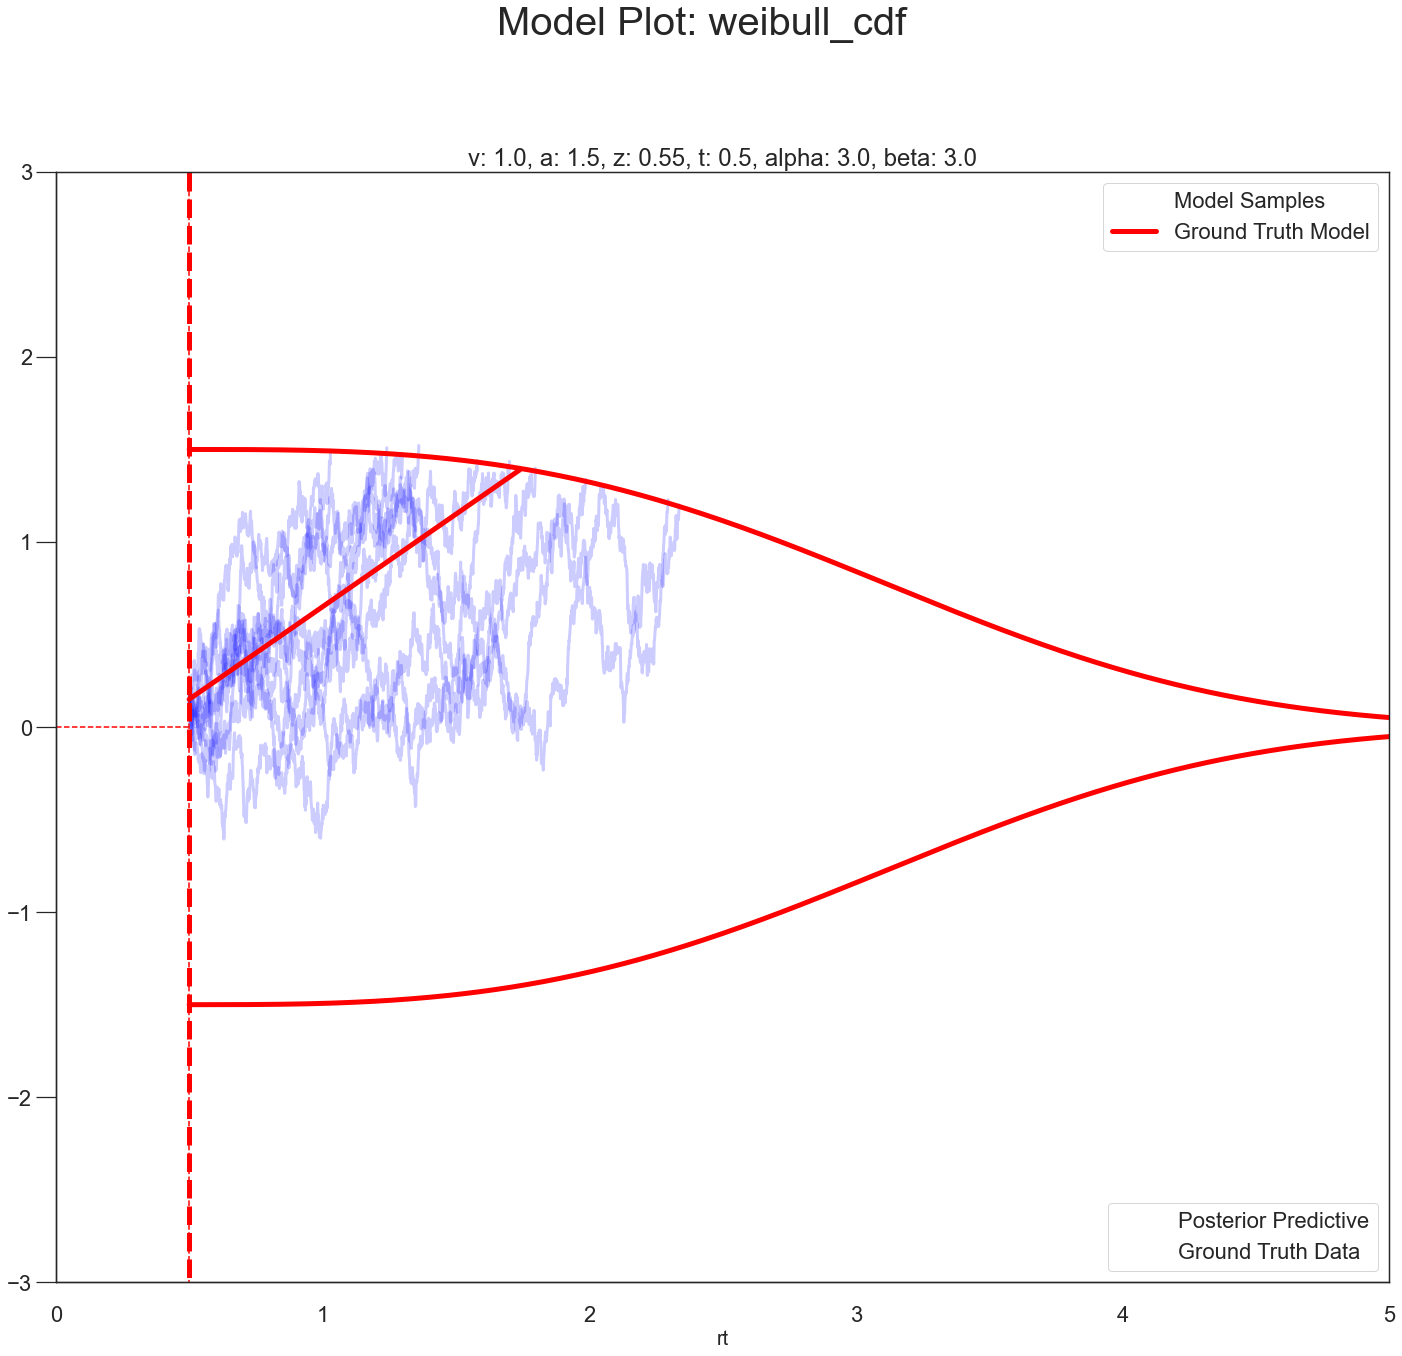

In [7]:
import seaborn as sns
hddm.graphs.model_plot(posterior_samples = hddm_model_single_subject.get_traces(), # ,
                       ground_truth_parameters = np.array([1, 1.5, 0.55, 0.5, 3.0, 3.0]),#{'v': 1, 'a': 1.5, 'z': 0.55, 't': 0.5,'alpha': 3.0,'beta': 3.0},
                       ground_truth_data = None, #hddm_data_single_subject,
                       model_ground_truth = model,
                       model_fitted = model,
                       n_posterior_parameters = 10,
                       cols = 1,
                       n_plots = 1,
                       max_t = 5,
                       show_model = True,
                       show_trajectories = True,
                       color_trajectories = 'blue',
                       n_trajectories = 10,
                       linewidth_trajectories = 3.0,
                       alpha_trajectories = 0.2,
                       input_is_hddm_trace = True,
                       datatype = 'single_subject',
                       ylimit = 3,
                       posterior_linewidth = 0,
                       gt_linewidth = 5,
                       hist_linewidth = 0,
                       scale_x = 1.0,
                       scale_y = 1.0)

Simulations for plot:  0
Simulations for plot:  1
Simulations for plot:  2
Simulations for plot:  3
Simulations for plot:  4


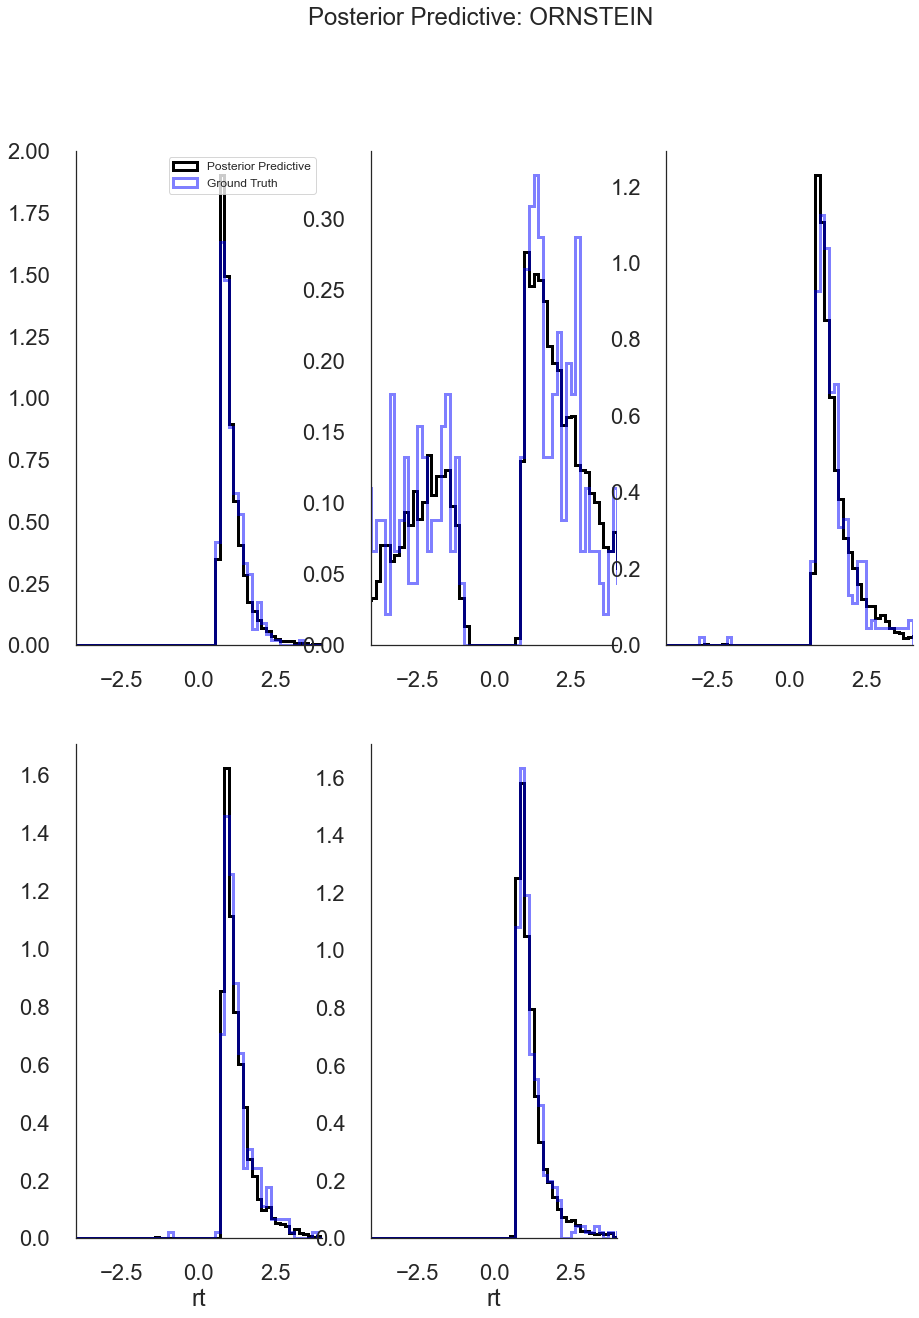

In [13]:
hddm.graphs.posterior_predictive_plot(posterior_samples = hddm_model_single_subject.get_traces(),
                                      ground_truth_parameters = hddm_data_single_subject[2],
                                      ground_truth_data = hddm_data_single_subject[0],
                                      model_ground_truth = model,
                                      model_fitted = model,
                                      datatype = 'hierarchical',
                                      input_is_hddm_trace = True,
                                      n_posterior_parameters = 100,
                                      bin_size = 0.15,
                                      max_t = 20,
                                      n_simulations_per_parameter = 50,
                                      xlimit = 4,
                                      scale_x = 0.75,
                                      scale_y = 0.5)

z
z_trans
z
z_subj_trans.000
z
z_subj_trans.001
z
z_subj_trans.002
z
z_subj_trans.003
z
z_subj_trans.004


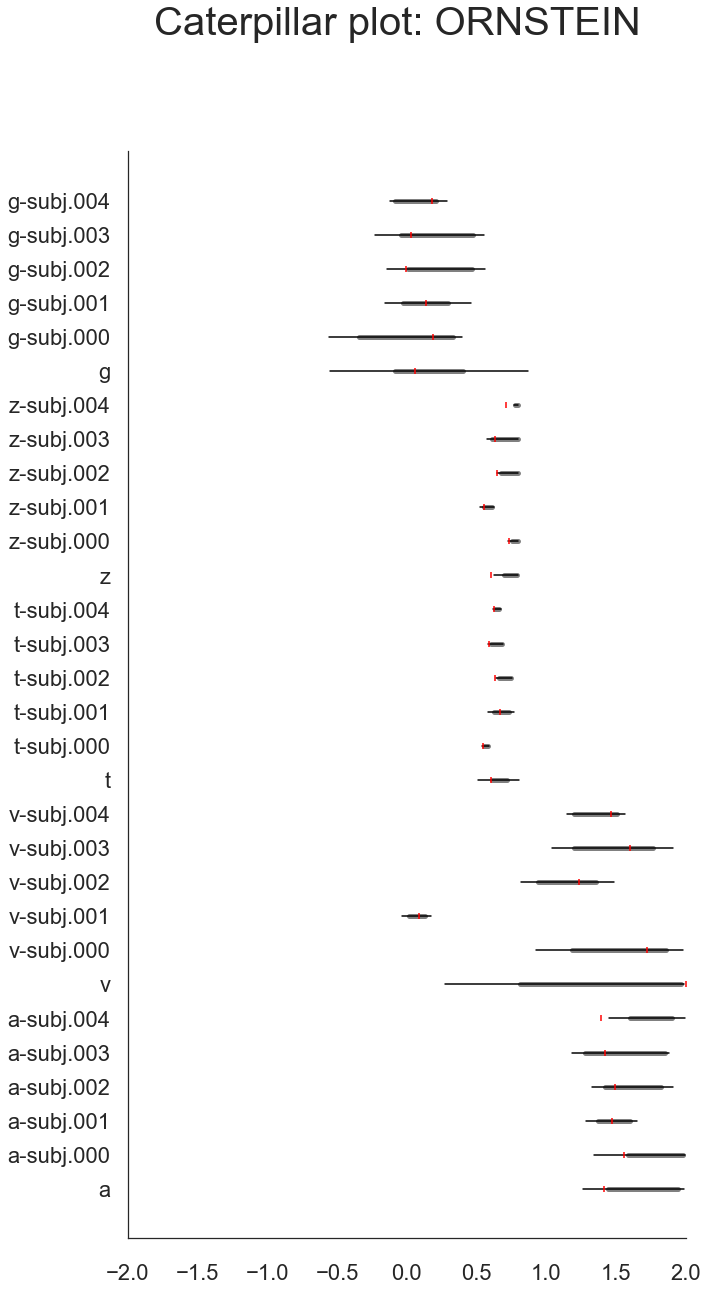

In [14]:
hddm.graphs.caterpillar_plot(posterior_samples = hddm_model_single_subject.get_traces(),
                             ground_truth_parameters = hddm_data_single_subject[1],
                             model_fitted = model,
                             drop_sd = True,
                             keep_key = None,
                             tick_label_size_x = 22,
                             tick_label_size_y = 14)

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'thresh'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


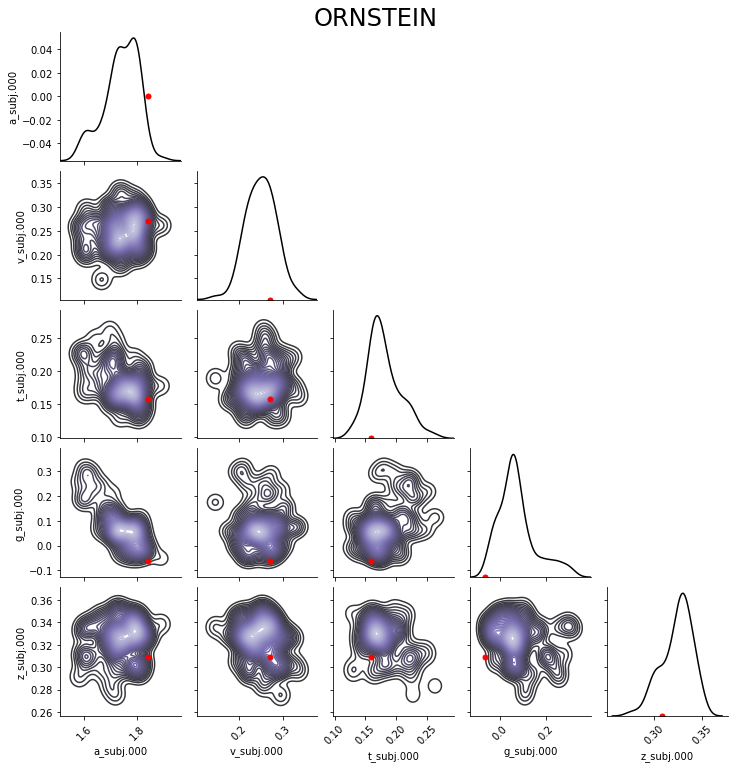

In [4]:
hddm.graphs.posterior_pair_plot(posterior_samples = hddm_model_single_subject.get_traces()[['a_subj.000', 'v_subj.000', 'z_subj_trans.000', 't_subj.000', 'g_subj.000']],
                                axes_limits = 'samples',
                                aspect_ratio = 1.0,
                                n_subsample = 100,
                                ground_truths = hddm_data_single_subject[1],
                                model_fitted = 'ornstein',
                                save = False,
                                )

In [6]:
hddm_model_single_subject.get_traces()[['a_subj.000', 'v_subj.000', 'z_subj_trans.000', 't_subj.000', 'g_subj.000']]

a_subj.000  v_subj.000  z_subj_trans.000  t_subj.000  g_subj.000
0     0.675829   -0.228932          2.817252    1.163033    0.646418
1     0.686896   -0.007004          2.769201    1.147720    0.803315
2     0.721362    0.010353          2.701077    1.148676    0.392293
3     0.707664   -0.163702          2.629224    1.144923    0.523764
4     0.707789    0.003951          2.332918    1.151561    0.769568
..         ...         ...               ...         ...         ...
95    0.672532   -0.022681          2.566439    1.149534    0.308364
96    0.684020   -0.102336          3.003877    1.160249    0.760130
97    0.680355   -0.052215          2.428680    1.152211    0.740534
98    0.680671   -0.008313          2.314326    1.141926    0.791976
99    0.679044    0.069862          2.544950    1.147254    0.826113

[100 rows x 5 columns]

In [10]:
np.sort(hddm_model_single_subject.get_traces().keys())

array(['a', 'a_std', 'a_subj.000', 'a_subj.001', 'a_subj.002',
       'a_subj.003', 'a_subj.004', 'g', 'g_std', 'g_subj.000',
       'g_subj.001', 'g_subj.002', 'g_subj.003', 'g_subj.004', 't',
       't_std', 't_subj.000', 't_subj.001', 't_subj.002', 't_subj.003',
       't_subj.004', 'v', 'v_std', 'v_subj.000', 'v_subj.001',
       'v_subj.002', 'v_subj.003', 'v_subj.004', 'z_std',
       'z_subj_trans.000', 'z_subj_trans.001', 'z_subj_trans.002',
       'z_subj_trans.003', 'z_subj_trans.004', 'z_trans'], dtype=object)

In [15]:
hddm_data_single_subject[1]

{'v': 2.0,
 'v_std': 2.0,
 'a': 1.4112081967101038,
 'a_std': 0.0904858760215007,
 'z': 0.6064642298543559,
 'z_std': 0.05820454579053995,
 'g': 0.061415381318033146,
 'g_std': 0.05648813210188245,
 't': 0.6007843139413754,
 't_std': 0.054588815637137446,
 'v_subj.000': 1.7203359603881836,
 'a_subj.000': 1.5543996095657349,
 'z_subj.000': 0.7297082543373108,
 'g_subj.000': 0.18500946462154388,
 't_subj.000': 0.5490291714668274,
 'v_subj.001': 0.08562971651554108,
 'a_subj.001': 1.472103238105774,
 'z_subj.001': 0.5540708899497986,
 'g_subj.001': 0.13502655923366547,
 't_subj.001': 0.6711236834526062,
 'v_subj.002': 1.2325512170791626,
 'a_subj.002': 1.4946868419647217,
 'z_subj.002': 0.6488333344459534,
 'g_subj.002': -0.008693003095686436,
 't_subj.002': 0.6323081254959106,
 'v_subj.003': 1.6016290187835693,
 'a_subj.003': 1.4203706979751587,
 'z_subj.003': 0.6337764859199524,
 'g_subj.003': 0.031351156532764435,
 't_subj.003': 0.587548017501831,
 'v_subj.004': 1.4666430950164795,
 'a

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'center up'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


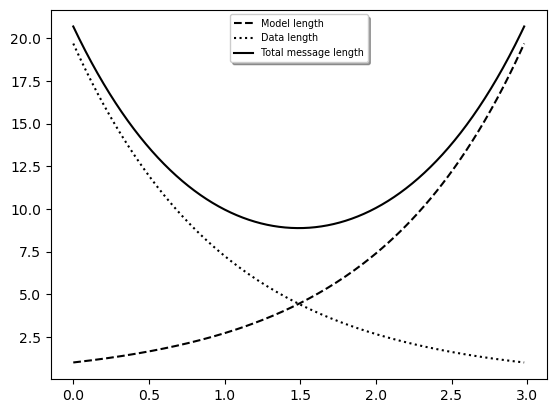

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

#legend = 
ax.legend(loc='center up', shadow=True, fontsize='x-small')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')

plt.show()

In [13]:
def my_new_fun(x):
    try:
        #x + 2
        print(x + 2)
    except:
        print('looks like x is not a number')
    return

In [49]:
dir(hddm_model_single_subject.knodes[3].parents['mu'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'append_node_to_db',
 'col_name',
 'create',
 'create_node',
 'create_node_name',
 'create_tag_and_subj_idx',
 'data',
 'depends',
 'get_node',
 'get_parent_depends',
 'hidden',
 'init_nodes_db',
 'kwargs',
 'name',
 'nodes',
 'nodes_db',
 'observed',
 'parents',
 'pass_dataframe',
 'pymc_node',
 'set_data',
 'subj']

In [53]:
hddm_model_single_subject.wfpt_class.random(hddm_model_single_subject)


AttributeError: 'HDDMnn' object has no attribute 'shape'

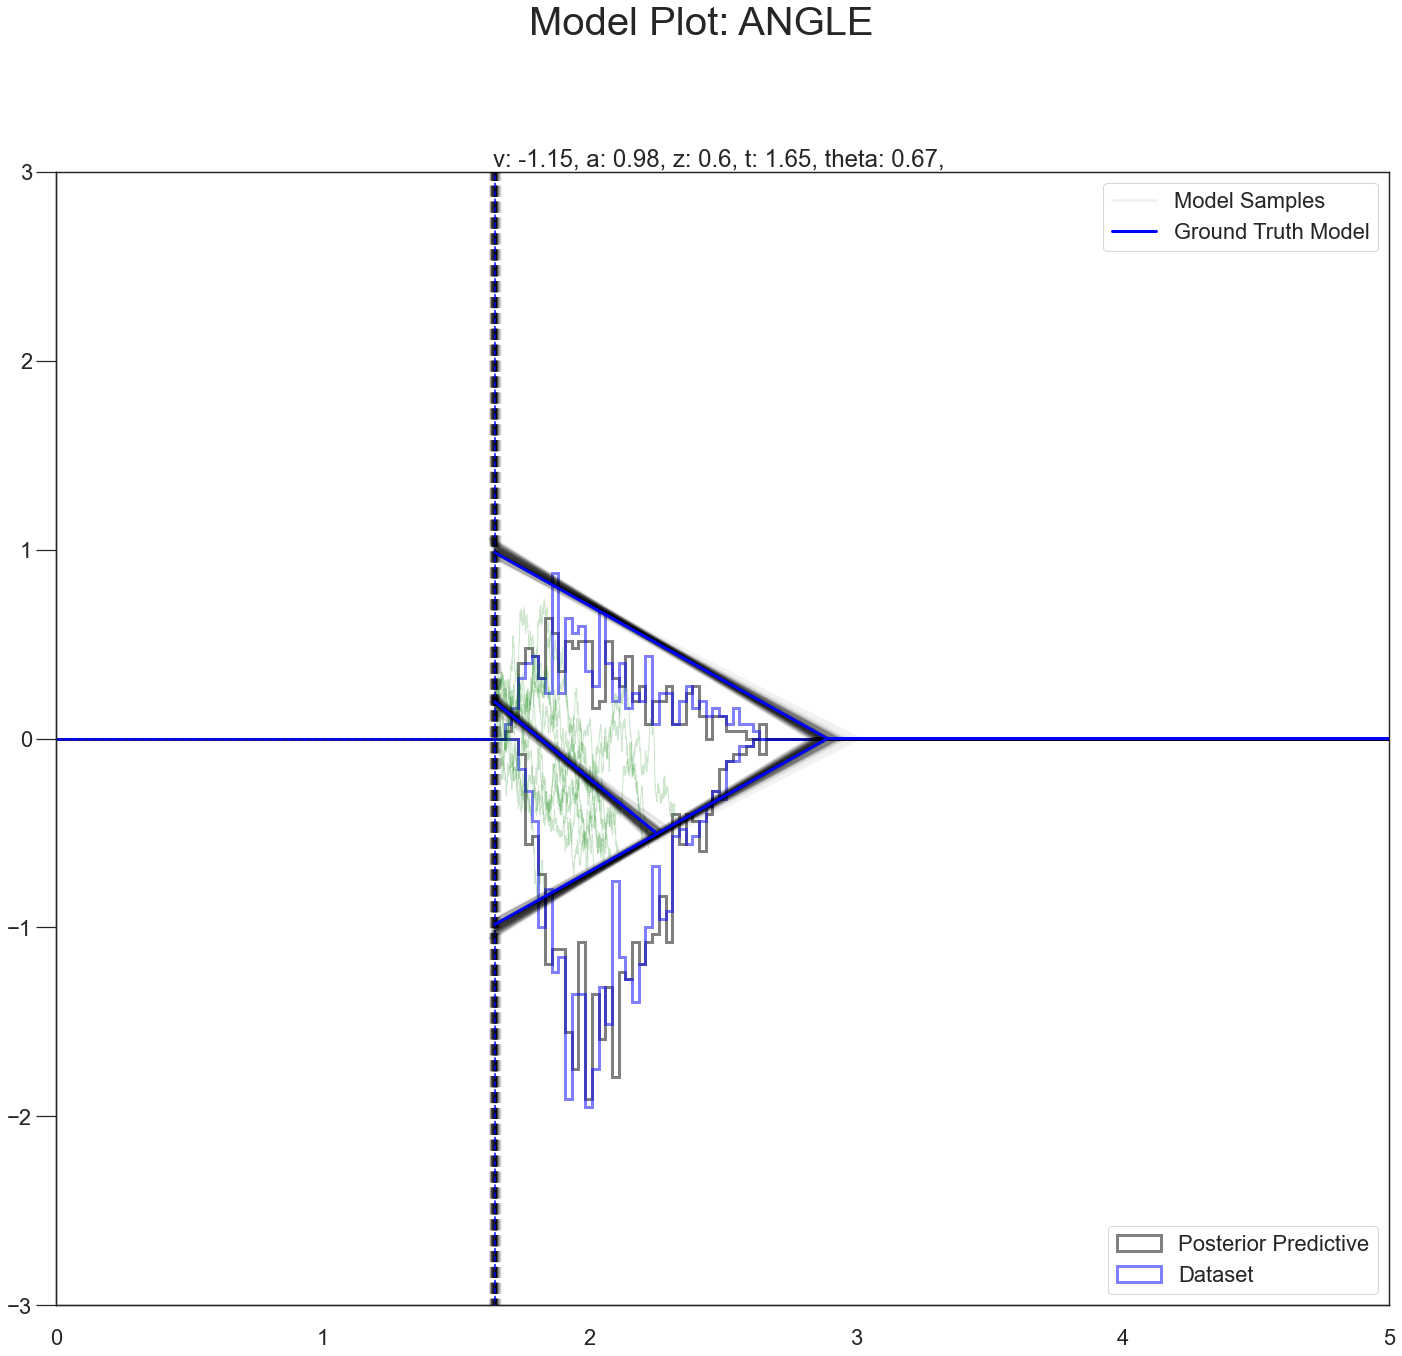

In [8]:
model_plot(ground_truth_parameters = params.values[0],
           ground_truth_data = hddm_data_single_subject[['rt', 'nn_response']].values,
           posterior_samples = hddm_model_single_subject.get_traces(),
           model_ground_truth = 'angle',
           model_fitted = model,
           n_posterior_parameters = 100,
           cols = 1,
           n_plots = 1,
           max_t = 5,
           show_model = True,
           show_trajectories = True,
           color_trajectories = 'green',
           n_trajectories = 10,
           linewidth_trajectories = 1.0,
           alpha_trajectories = 0.2,
           input_is_hddm_trace = True,
           datatype = 'single_subject',
           ylimit = 3,
           posterior_linewidth = 3,
           gt_linewidth = 3,
           hist_linewidth = 3,)



        #    posterior_samples = None,
        #        ground_truth_parameters = None,
        #        ground_truth_data = None,
        #        model_ground_truth = 'weibull_cdf',
        #        model_fitted = 'angle',
        #        input_is_hddm_trace = False,
        #        datatype = 'single_subject', # 'hierarchical', 'single_subject', 'condition' # data structure
        #        condition_column = 'condition', # data structure
        #        n_plots = 4, 
        #        n_posterior_parameters = 500,
        #        n_simulations_per_parameter = 10,
        #        cols = 3, # styling
        #        max_t = 5, # styling
        #        show_model = True, # styling
        #        show_trajectories = False, # styling
        #        n_trajectories = 10,
        #        color_trajectories = 'blue',
        #        ylimit = 2, # styling
        #        posterior_linewidth = 3, # styling
        #        gt_linewidth = 3, # styling
        #        hist_linewidth = 3, # styling
        #        bin_size = 0.025, # styling
        #        save = False):

In [ ]:
print('dic: ', hddm_model_single_subject.dic)
print(hddm_model_single_subject.gen_stats()['mean'])
print('gt params: ', params)

In [ ]:
params

In [ ]:
posterior_predictive_plot(posterior_samples = hddm_model_single_subject.get_traces(), #hddm_model_weibull_single_subject.get_traces(),
                          ground_truths_parameters = params.values[0], #weibull_params.values[0],
                          ground_truths_data = np.concatenate([simulations[0], simulations[1]], axis = 1), # None
                          n_plots = 1,
                          cols = 1,
                          model_fitted = model,
                          model_gt = None, #'levy', #'weibull_cdf',
                          datatype = 'single_subject',
                          n_post_params = 200,
                          samples_by_param = 100,
                          xlimit = 10,
                          bin_size = 0.025,
                          hist_linewidth = 1)

In [ ]:
# Caterpillar Plot: (Parameters recovered ok?)
caterpillar_plot(posterior_samples = hddm_model_single_subject.get_traces(),
                 ground_truths = params.values[0], #weibull_params.values[0],
                 model = model,
                 datatype = 'single_subject',
                 drop_sd = True)

# CONDITION

In [ ]:
model = 'ornstein'
n_samples_by_condition = 500
p_outlier = [] # ['p_outlier']


hddm_data_condition, gt_condition, gt_mat_condition = simulator_condition_effects(n_conditions = 4,
                                                                                  n_samples_by_condition = n_samples_by_condition,
                                                                                  condition_effect_on_param = ['v', 'a'],
                                                                                  model = model)


hddm_model_condition = hddm.HDDMnn(hddm_data_condition, 
                                   model = model,
                                   informative = False,
                                   include = include_conf[model],
                                   p_outlier = 0.,
                                   w_outlier = 0.,
                                   is_group_model = False, 
                                   depends_on = {'v': 'condition', 'a': 'condition'})


hddm_model_condition.sample(500, burn = 100)

In [ ]:
# Caterpillar Plot: (Parameters recovered ok?)
caterpillar_plot(posterior_samples = hddm_model_condition.get_traces(),
                 ground_truths = gt_condition, #weibull_params.values[0],
                 model = model,
                 datatype = 'condition',
                 drop_sd = True)

# GROUP

In [ ]:
model = 'angle'
n_subjects = 10
n_samples_by_subject = 500
p_outlier = [] # ['p_outlier']


# Simulate data angle
hddm_data_hierarchical, gt_hierarchical, gt_mat_hierarchical = simulator_hierarchical(n_subjects = n_subjects,
                                                                                      model = model,
                                                                                      n_samples_by_subject = n_samples_by_subject)


hddm_hierarchical_model = hddm.HDDMnn(hddm_data_hierarchical, 
                                                    model = model,
                                                    informative = False,
                                                    include = include_conf[model],
                                                    p_outlier = 0,
                                                    w_outlier = 0,
                                                    is_group_model = True)

# # Sampling:
nmcmc = 500
hddm_hierarchical_model.sample(nmcmc,
                               burn = 100)

In [ ]:
hddm_hierarchical_model.gen_stats()

In [ ]:
gt_hierarchical

In [ ]:
# Subset data?
hddm_data_hierarchical_limited = hddm_data_hierarchical.iloc[:2500]
str_allowed = ['005', 
               '006', 
               '007', 
               '008', 
               '009', 
               '010', 
               '011', 
               '012', 
               '013', 
               '014', 
               '015', 
               '016',
               '017',
               '018',
               '019']
gt_hierarchical_limited = (gt_hierarchical).copy()
for str_tmp in gt_hierarchical.keys():
    for str_allowed_tmp in str_allowed:
        if str_allowed_tmp in str_tmp:
            gt_hierarchical_limited.pop(str_tmp)

In [ ]:
# Caterpillar Plot
caterpillar_plot(posterior_samples = hddm_hierarchical_model.get_traces(),
                 ground_truths = gt_hierarchical,
                 model = model,
                 datatype = 'hierarchical',
                 x_lims = [-2, 2],
                 aspect_ratio = 2,
                 drop_sd = False,
                 save = False)

# Regression

In [2]:
hddm.simulators.simulator_covariate

<function hddm.simulators.hddm_dataset_generators.simulator_covariate(dependent_params=['v'], model='angle', n_samples=1000, betas={'v': 0.1}, covariate_magnitudes={'v': 1.0}, prespecified_params=None, subj_id='none', bin_dim=None, bin_pointwise=False, max_t=20.0, delta_t=0.001)>

Simulator data: 
[[1.2428889 ]
 [2.1679208 ]
 [1.6348959 ]
 [1.310888  ]
 [1.5528921 ]
 [1.1218905 ]
 [1.0928909 ]
 [2.3529296 ]
 [1.5038898 ]
 [0.96989244]
 [0.9878922 ]
 [1.4618878 ]
 [1.16589   ]
 [1.8029038 ]
 [0.9738924 ]
 [1.0308917 ]
 [1.4038868 ]
 [1.3278878 ]
 [1.1818898 ]
 [0.83189416]
 [1.1418903 ]
 [1.7048992 ]
 [1.699899  ]
 [1.1278903 ]
 [0.7648951 ]
 [1.5068899 ]
 [1.3018882 ]
 [1.4698882 ]
 [0.97589236]
 [1.5678928 ]
 [0.9558926 ]
 [1.4318864 ]
 [1.3818872 ]
 [0.8628938 ]
 [1.3628874 ]
 [1.3338878 ]
 [1.2518888 ]
 [0.9158931 ]
 [0.8948934 ]
 [2.4979286 ]
 [0.99889207]
 [1.5128902 ]
 [1.4288865 ]
 [1.443887  ]
 [2.3709302 ]
 [1.1968895 ]
 [1.2888883 ]
 [1.3428876 ]
 [1.0768911 ]
 [1.701899  ]
 [1.4978895 ]
 [1.2398889 ]
 [1.2038894 ]
 [1.4928893 ]
 [1.0508914 ]
 [0.80189455]
 [2.0359147 ]
 [1.318888  ]
 [1.6338959 ]
 [1.829905  ]
 [0.82289433]
 [1.8099041 ]
 [1.0588913 ]
 [1.3608874 ]
 [0.8978933 ]
 [1.0478914 ]
 [1.8449057 ]
 [1.3848871 ]
 [1.764902  ]
 [1.550892  ]
 [1

(           rt  response subj_idx      BOLD
 0    1.242889       1.0     none -0.837294
 1    2.167921       1.0     none -0.789145
 2    1.634896       1.0     none -0.261834
 3    1.310888       1.0     none  0.244684
 4    1.552892       1.0     none  0.021591
 ..        ...       ...      ...       ...
 995  1.332888       1.0     none  0.559524
 996  0.676896       0.0     none  0.068152
 997  1.339888       1.0     none -0.315425
 998  1.212889       1.0     none -0.466198
 999  1.080891       1.0     none -0.504896
 
 [1000 rows x 4 columns],
 {'v_beta': 0.1,
  'v': 1.6017320626996416,
  'a': 1.6631579831798597,
  'z': 0.2920609256737261,
  't': 0.43289576599994894,
  'theta': 0.49219324311745316})

In [15]:
# Ornstein params
model = 'ddm'
n_samples = 1000

hddm_data_single_subject_regress = hddm.simulators.simulator_covariate(dependent_params = ['v'],
                                                                        model = model,
                                                                        n_samples = 1000,
                                                                        betas = {'v': 0.2},
                                                                        covariate_magnitudes = {'v': 1.0},
                                                                        prespecified_params = None,
                                                                        subj_id = 'none',
                                                                        bin_dim = 512,
                                                                        bin_pointwise = True,
                                                                        max_t = 10.0,
                                                                        delta_t = 0.001)

# Add a regressor:
#hddm_data_single_subject_regress['BOLD'] = np.random.uniform(low = - 1, high = 1, size = n_samples)

#v_reg = {'model': 'v ~ 1 + BOLD', 'link_func': lambda x: x}
#a_reg = {'model': 'a ~ 1 + BOLD', 'link_func': lambda x: x}
#t_reg = {'model': 't ~ 1 + BOLD', 'link_func': lambda x: x}
v_reg = {'model': 'v ~ 1 + BOLD', 'link_func': lambda x: x}

reg_descr = [v_reg] #[v_reg, a_reg, t_reg, g_reg] # theta_reg]

hddm_reg = hddm.HDDMnnRegressor(hddm_data_single_subject_regress[0], 
                                reg_descr, 
                                include = set(hddm_include_config[model]),
                                model = model,
                                network_type = 'cnn',
                                nbin = 512,
                                p_outlier = 0.0,
                                informative = False
                                )

8838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
       0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838, 0.7138838,
 

In [18]:
hddm_data_single_subject_regress[0]['rt'].ma()

355.0

In [19]:
# # Sampling:
nmcmc = 200
hddm_reg.sample(nmcmc,
                burn = 100)

 [                  1%                  ] 3 of 200 complete in 7.6 secHalting at iteration  2  of  200
Could not generate output statistics for v_Intercept
Could not generate output statistics for a
Could not generate output statistics for t
Could not generate output statistics for z
Could not generate output statistics for v_BOLD
Could not generate output statistics for z_trans


TypeError: 'NoneType' object is not subscriptable

In [7]:
hddm_reg.get_traces()

a         t   z_trans  v_Intercept    v_BOLD
0   2.168900  0.175033  0.299587     0.161984  0.165938
1   2.178888  0.174151  0.287654     0.135191  0.204531
2   2.136554  0.185151  0.336207     0.114406  0.249333
3   2.131382  0.192000  0.293166     0.131954  0.148201
4   2.197081  0.181785  0.316754     0.105502  0.145105
..       ...       ...       ...          ...       ...
95  2.107556  0.194747  0.208346     0.152130  0.219972
96  2.192011  0.173493  0.176828     0.167843  0.223900
97  2.141831  0.181034  0.151564     0.157332  0.193799
98  2.175236  0.184162  0.343396     0.146682  0.160781
99  2.111407  0.178746  0.323138     0.100978  0.229624

[100 rows x 5 columns]

In [8]:
hddm_data_single_subject_regress


(        rt  response subj_idx      BOLD
 0     51.0       1.0     none  0.823910
 1    252.0       1.0     none  0.131405
 2    283.0       0.0     none -0.006368
 3     37.0       1.0     none  0.804340
 4    145.0       1.0     none  0.833174
 ..     ...       ...      ...       ...
 995   51.0       0.0     none -0.650154
 996  233.0       0.0     none -0.057240
 997  148.0       1.0     none  0.344089
 998  301.0       0.0     none -0.008406
 999  405.0       1.0     none -0.827016
 
 [1000 rows x 4 columns],
 {'v_beta': 0.2,
  'v': 0.3222776319897116,
  'a': 2.166344532834477,
  'z': 0.5256833047643146,
  't': 0.20554902871092628})

In [10]:
post_pred = hddm.utils.post_pred_gen(hddm_reg, samples = 500)

16,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916, 0.5281916,
       0.5281916, 0.5281916, 0.5281916, 0.52819

(array([ 4.,  0.,  0.,  2.,  7.,  5.,  4., 10.,  9.,  9.,  3.,  4.,  7.,
         4., 11.,  8.,  4.,  1.,  1.,  3.,  2.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.1442198 , 0.14960397, 0.15498814, 0.16037231, 0.16575649,
        0.17114066, 0.17652483, 0.181909  , 0.18729317, 0.19267735,
        0.19806152, 0.20344569, 0.20882986, 0.21421403, 0.21959821,
        0.22498238, 0.23036655, 0.23575072, 0.24113489, 0.24651907,
        0.25190324, 0.25728741, 0.26267158, 0.26805575, 0.27343993,
        0.2788241 , 0.28420827, 0.28959244, 0.29497662, 0.30036079,
        0.30574496]),
 <a list of 30 Patch objects>)

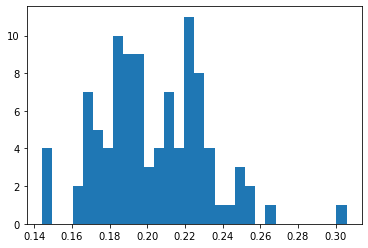

In [11]:
plt.hist(hddm_reg.get_traces()['v_BOLD'], bins = 30)

In [ ]:
post_pred.index.names

In [ ]:
post_pred

(array([45.,  5.,  5.,  5.,  7.,  4.,  8.,  9.,  6., 12.,  8., 17., 15.,
        14., 26., 16., 23., 18., 20., 23., 20., 20., 13.,  2.,  0.,  0.,
        14., 43., 43., 56., 53., 37., 51., 46., 44., 32., 23., 17., 26.,
        12., 17., 18., 15., 17., 15., 11.,  6.,  7.,  2., 54.]),
 array([-9.98046875, -9.58125   , -9.18203125, -8.7828125 , -8.38359375,
        -7.984375  , -7.58515625, -7.1859375 , -6.78671875, -6.3875    ,
        -5.98828125, -5.5890625 , -5.18984375, -4.790625  , -4.39140625,
        -3.9921875 , -3.59296875, -3.19375   , -2.79453125, -2.3953125 ,
        -1.99609375, -1.596875  , -1.19765625, -0.7984375 , -0.39921875,
         0.        ,  0.39921875,  0.7984375 ,  1.19765625,  1.596875  ,
         1.99609375,  2.3953125 ,  2.79453125,  3.19375   ,  3.59296875,
         3.9921875 ,  4.39140625,  4.790625  ,  5.18984375,  5.5890625 ,
         5.98828125,  6.3875    ,  6.78671875,  7.1859375 ,  7.58515625,
         7.984375  ,  8.38359375,  8.7828125 ,  9.18203125,

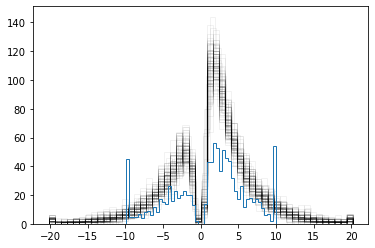

In [14]:
for j in range(100):
    tmp_dat = post_pred.loc[[('wfpt', j, i) for i in range(1000)]]
    plt.hist(tmp_dat['rt'].values * tmp_dat['response'].values, histtype= 'step', bins = 50, alpha = 0.05, color = 'black')

tmp_obs_dat = hddm_data_single_subject_regress[0]
tmp_obs_dat.loc[tmp_obs_dat['response'] == 0, 'response'] = -1
plt.hist(tmp_obs_dat['rt'].values * tmp_obs_dat['response'].values / 51.2, histtype = 'step', bins = 50)

In [8]:
hddm.utils.post_pred_gen(hddm_reg)

printing observeds
     knode_name stochastic observed   subj  node tag depends hidden   rt  \
wfpt       wfpt      False     True  False  wfpt  ()      []  False  NaN   

     response subj_idx BOLD mean  std 2.5q  25q  50q  75q 97.5q mc err  
wfpt      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  
printing len of observeds
1
printing dir of observeds
['BOLD', 'T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__',

rt  response subj_idx
node sample                                 
wfpt 0      0    1.301516       0.0     none
            1    1.339516       0.0     none
            2    0.898520       0.0     none
            3    1.144518       0.0     none
            4    1.167518       0.0     none
...                   ...       ...      ...
     499    995  1.287562       0.0     none
            996  1.154564       0.0     none
            997  1.696557       0.0     none
            998  1.265563       0.0     none
            999  1.253563       0.0     none

[500000 rows x 3 columns]

# CNN TESTS

In [3]:
nmcmc = 1000
model = 'ddm'
n_samples = 500
# n_samples_by_condition = 500
# split_param = 'z'
includes = hddm_include_config[model]
p_outlier = [] # empty of ['p_outlier']
includes += p_outlier

In [ ]:
#model = 'angle'
params =  make_parameter_sets(model = model,
                              n_parameter_sets = 1)

simulations = simulator(theta = params.values[0],
                        model = model, 
                        n_samples = n_samples,
                        bin_pointwise = True,
                        max_t = 10.0,
                        bin_dim = 512)

In [ ]:
#simulations[0]

In [ ]:
hddm_binned_data = hddm_preprocess(simulations)
hddm_binned_data['rt'] = hddm_binned_data['rt'].values.astype(np.int)
hddm_binned_data['response'] = hddm_binned_data['response'].values.astype(np.int)

In [ ]:
hddm_binned_data

In [ ]:
#hddm_binned_data_old = hddm_binned_data

In [ ]:
hddm_model = hddm.HDDMnn(hddm_binned_data, 
                         model = model,
                         network_type = 'cnn',
                         informative = False,
                         include = includes,
                         p_outlier = 0.00)

In [ ]:
hddm_model.sample(500,
                  burn = 50) #  dbname = 'traces.db', db = 'pickle')

In [ ]:
hddm_model.gen_stats()

In [ ]:
params

In [ ]:
plt.hist(0.2 + (0.8 - 0.2) * (np.exp(np.array(hddm_model.get_traces()['z_trans'])) / (1 + np.exp(np.array(hddm_model.get_traces()['z_trans'])))))

In [ ]:
# Posterior Predictive: Do we generate meaningful data from the Posterior Model?
simulations_plot = simulator(theta = params.values[0],
                             model = model, 
                             n_samples = 20000,
                             bin_pointwise = False,
                             max_t = 10.0,
                             bin_dim = None)

posterior_predictive_plot(ground_truths_parameters = params.values[0],
                          ground_truths_data = np.concatenate([simulations_plot[0], simulations_plot[1]], axis = 1),
                          posterior_samples = hddm_model.get_traces(),
                          model_gt = None,
                          model_fitted = model,
                          n_post_params = 200,
                          n_plots = 1,
                          max_t = 10, 
                          input_hddm_trace = True,
                          datatype = 'single_subject',
                          hist_linewidth = 3)

In [ ]:
# Posterior Predictive: Do we generate meaningful data from the Posterior Model?
model_plot(ground_truths_parameters = params.values[0],
           ground_truths_data = np.concatenate([simulations_plot[0], simulations_plot[1]], axis = 1),
           posterior_samples = hddm_model.get_traces(),
           model_gt = model,
           model_fitted = model,
           n_post_params = 100,
           cols = 1,
           n_plots = 1,
           max_t = 5, 
           show_model = True,
           input_hddm_trace = True,
           datatype = 'single_subject',
           ylimit = 3,
           posterior_linewidth = 3,
           gt_linewidth = 3,
           hist_linewidth = 3,)

In [ ]:
posterior_pair_plot(posterior_samples = hddm_model.get_traces(),
                    height = 10,
                    aspect = 1,
                    n_subsample = 200,
                    ground_truths = params.values[0],
                    model = model)

In [ ]:
#hddm_model.dbname = 'disk'


In [ ]:
#hddm_model.mc.db.__name__
hddm_model.mc.db.filename 

In [ ]:
hddm_model.mc.db.__name__ = 'pickle'
hddm_model.mc.db.filename = 'test_traces.pickle'

In [ ]:
hddm_model.save('hddm_model_test_saver.pickle')

In [ ]:
new_mod = hddm.load('hddm_model_test_saver.pickle')

In [ ]:
new_mod.gen_stats()

In [ ]:
hddm_model.gen_stats()

In [ ]:
params

In [ ]:
import tensorflow as tf
from hddm.cnn.wrapper import Infer
from hddm.cnn.config import *
tf.reset_default_graph()
InferenceClass = Infer(config = Config('ddm', 512))

In [ ]:
#params = np.zeros((1, 1, 4, 1))
tiny_x = np.array([-1.0, 2.0, 0.5, 2.0])
#tiny_x = np.zeros(4)
#tiny_x = np.expand_dims(tiny_x, axis = (0, 1, 3))
x = InferenceClass.forward(tiny_x)

#0.50	1.150202	0.601982	0.580975

In [ ]:
import numpy as np
from .train_detector import cnn_model_struct
from .config import *
import tensorflow as tf
import tqdm, gzip, cProfile, time, argparse, pickle, os
# just to prevent tensorflow from printing logs
os.environ['TF_CPP_MIN_LOG_LEVEL']="2"
tf.logging.set_verbosity(tf.logging.ERROR)

class Infer:
	def __init__(self, config):
		self.cfg = config
		self.target = []
		self.inp = tf.placeholder(tf.float32, self.cfg.test_param_dims)
		self.initialized = False

		with tf.device('/gpu:0'):
			with tf.variable_scope("model", reuse=tf.AUTO_REUSE) as scope:
				self.model = cnn_model_struct()
				self.model.build(self.inp, self.cfg.test_param_dims[1:], self.cfg.output_hist_dims[1:], train_mode=False, verbose=False)
				self.gpuconfig = tf.ConfigProto()
				self.gpuconfig.gpu_options.allow_growth = True
				self.gpuconfig.allow_soft_placement = True
				self.saver = tf.train.Saver()
		
		self.sess = tf.Session(config=self.gpuconfig)
		print(self.cfg.model_output)
		ckpts = tf.train.latest_checkpoint(self.cfg.model_output)
		self.saver.restore(self.sess, ckpts)

	def __getitem__(self, item):
		return getattr(self, item)

	def __contains__(self, item):
		return hasattr(self, item)

	def forward(self, params):
		pred_hist = self.sess.run(self.model.output, feed_dict={self.inp:params.reshape(self.cfg.test_param_dims)})
		return pred_hist

def load_cnn(model, nbin):
	cfg = Config(model=model, bins=nbin)
	inference_class = Infer(config=cfg)
	return inference_class.forward


if __name__ == '__main__':
	parser = argparse.ArgumentParser()
	parser.add_argument('--model', type=str)
	parser.add_argument('--nbin', type=int)
	args = parser.parse_args()

	cfg = Config(model=args.model, bins=args.nbin)
	inference_class = Infer(config=cfg)

	example_params = np.array([0., 1.5, 0.5, 1])
	print(inference_class.forward(example_params))

# SAVING MODEL

In [ ]:
model = 'ddm'
n_samples = 1000
p_outlier = [] # ['p_outlier']


params = make_parameter_sets(model = model,
                             n_parameter_sets = 1)

simulations = simulator(theta = params.values[0],
                        model = model,
                        n_samples = n_samples)

hddm_data_single_subject = hddm_preprocess(simulations)



# hddm_model_ddm_analytic_single_subject = hddm.HDDMnn(hddm_data_ddm_single_subject, 
#                                                          model = 'ddm_analytic',
#                                                          informative = False,
#                                                          include = ['z'],
#                                                          is_group_model = False)

# Defining a hddm model
hddm_model_single_subject = hddm.HDDM(hddm_data_single_subject,
                                      informative = False,
                                      include = include_conf[model],
                                      p_outlier = 0.0,
                                      is_group_model = False)

In [ ]:
hddm_model_single_subject.sample(500, burn = 100, dbname = 'traces.db', db = 'pickle')

In [ ]:
hddm_model_single_subject.mc.db.__name__ 

In [ ]:

hddm_model_single_subject.mc.db.filename 

In [ ]:
hddm_model_single_subject.save('test_hddm_saver.pickle')

In [15]:
# 
import numpy as np 
x = list(np.random.choice(10, size = 100, replace = True))

In [16]:
def my_key(n):
    if n == 0:
        return 1
    else:
        return 0

In [14]:
sorted(x, key=my_key)

[1,
 8,
 4,
 7,
 8,
 8,
 2,
 6,
 6,
 7,
 1,
 1,
 2,
 3,
 7,
 7,
 8,
 9,
 5,
 5,
 9,
 4,
 3,
 4,
 3,
 1,
 8,
 5,
 5,
 7,
 1,
 1,
 7,
 8,
 5,
 5,
 1,
 4,
 6,
 5,
 4,
 1,
 4,
 3,
 2,
 6,
 7,
 2,
 7,
 4,
 4,
 2,
 2,
 8,
 2,
 7,
 6,
 8,
 6,
 1,
 5,
 2,
 9,
 5,
 5,
 6,
 1,
 7,
 3,
 9,
 7,
 5,
 7,
 9,
 4,
 4,
 2,
 6,
 9,
 8,
 3,
 4,
 9,
 7,
 7,
 8,
 1,
 8,
 5,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [17]:
x.sort(key = my_key)

In [18]:
x

[2,
 5,
 9,
 7,
 2,
 7,
 2,
 3,
 2,
 1,
 6,
 9,
 5,
 3,
 1,
 3,
 5,
 8,
 3,
 5,
 9,
 4,
 5,
 1,
 7,
 8,
 4,
 5,
 8,
 1,
 4,
 6,
 9,
 6,
 1,
 9,
 9,
 6,
 2,
 1,
 8,
 2,
 5,
 5,
 3,
 9,
 8,
 5,
 8,
 6,
 3,
 7,
 7,
 7,
 6,
 9,
 4,
 4,
 4,
 1,
 6,
 4,
 4,
 5,
 2,
 9,
 4,
 9,
 8,
 8,
 6,
 4,
 1,
 8,
 5,
 7,
 2,
 4,
 1,
 7,
 3,
 6,
 8,
 2,
 8,
 7,
 1,
 6,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]